<font face='Liberation serif' size=4>**Цель: определить позицию Меркур авто на рынке Казахастана**</font>

<font face='Liberation serif' size=4>**Задачи:**   
    
- очистить данные;   
    
- провести EDA;   
    
- проанализировать рынок;   
    
- проанализировать состояние Меркур авто
</font>

<div class="alert alert-block alert-success">   
    
<font face='Liberation serif' size=3 color='black'>**Описание данных:**
- **company:** Наименование дилера
- **brand:** Наименование бренда 
- **model:** Наименование модели автомобиля 
- **release_year:** Год выпуска автомобиля 
- **manufacturing_country:** Наименование страны-производителя
- **fuel_type:** Тип топлива, используемый автомобилем 
- **engine_volume:** Объем двигателя 
- **transmission_type:** Тип трансмиссии 
- **drive_type:** Тип привода
- **region:** Район 
- **quantity:** Количество проданных автомобилей в заказе
- **price_usd:** Цена автомобиля в долларах
- **sell_price_usd:** Общая стоимость заказа
- **state:** Область
- **segment_2013:** Сегмент
- **class_2013:** Класс
- **sales_date:** Дата продажи
</font>
    
</div>

### <font face='Liberation serif' size=4>**Загружаем библиотеки**</font>

In [226]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from datetime import datetime

import warnings

%matplotlib inline

<font face='Liberation serif' size=4>**Отключаем предупреждения**</font>

In [2]:
warnings.filterwarnings('ignore')

## <font face='Liberation serif' size=6>**1. Загружаем данные**</font>

### <font face='Liberation serif' size=4>**Загружаем датасет**</font>

In [3]:
df = pd.read_csv('/ya/auto_kz_2019.csv', sep=';', decimal=',')

<font face='liberation serif' size=5 color='red'><b>Пояснение загрузки:</b></font>

<font face='Liberation serif' size=4 color='crimson'>***Здесь при загрузке используем достаточно редкий аргумент `decimal` - знак, который отделяет целое число от десятичной части, обычно по умолчанию это точка, но в датасетах, созданных в эксель, очень часто разделителем является запятая - чтобы числовые данные в таком случае отображались корректно мы используем параметр `decimal` со значением запятая.***
    
***sep (от separator) определяет символ, которым столбцы отделяются друг от друга, по умолчанию - это запятая, но в нашем случае используется второй по частоте символ - точка с запятой, поэтому указываем разделитель в параметре `sep`, третьим по частоте использования является табуляция - указывается вот так при загрузке - `sep='\t'`***</font>

<font face='Liberation serif' size=4>**Смотрим на датасет**</font>

In [4]:
start_shape = df.shape
print(f'Итого имеем {start_shape[0]} наблюдений с {start_shape[1]} признаками')

Итого имеем 39966 наблюдений с 25 признаками


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

<font face='Liberation serif' size=4>Необходимо менять типы данных в столбцах</font>

In [6]:
df.describe()

,Год,Количество,"Цена, USD","Продажа, USD"
count,39966.0,39960.000000,39966.000000,3.996600e+04
mean,2019.0,1.348198,28250.157462,3.375767e+04
std,0.0,2.373089,20005.756629,5.070245e+04
min,2019.0,-1.000000,7100.000000,-3.558825e+04
25%,2019.0,1.000000,15518.499690,1.660193e+04
50%,2019.0,1.000000,24282.267910,2.624896e+04
75%,2019.0,1.000000,32505.655770,3.500000e+04
max,2019.0,115.000000,328510.970600,3.778206e+06


## <font face='Liberation serif' size=6>**2. Чистим данные**</font>

<font face='Liberation serif' size=4>Мне сразу не нравятся названия колонок - названия колонок на русском языке + пробелы,  работа будет происходить очень медленно. Под замену.</font>

In [7]:
df.sample(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
16314,2019,Май,БИПЭК АВТО,Kia,Rio,NaN,2019,Республика Казахстан,Бензин,"1,6",...,NaN,NaN,2.0,13500.00000,27000.00000,Восточно-Казахстанская область,Легковые автомобили,B класс,B,Локальное производство
17321,2019,Июнь,БИПЭК АВТО,Lada,Granta,NaN,2019,Республика Казахстан,Бензин,"1,596",...,NaN,NaN,32.0,7100.00000,227200.00000,г.Алматы,Легковые автомобили,B класс,B,Локальное производство
4049,2019,Июль,Astana Motors,Hyundai,Accent,Hyundai Accent HCr Comfort & Advanced Pack,2019,Республика Казахстан,Бензин,"1,6 MPI",...,Физ. Лицо,кредит,1.0,16910.58797,16910.58797,Карагандинская область,Легковые автомобили,B класс,B,Локальное производство
9894,2019,Январь,Astana Motors,Hyundai,Tucson,Hyundai Tucson ix35 FL Comfort,2018,Республика Казахстан,Бензин,2,...,Физ. Лицо,NaN,1.0,22966.36930,22966.36930,г.Нур-Султан,Внедорожники,Компактные SUV,K1,Локальное производство
5683,2019,Июнь,Astana Motors,Hyundai,Creta,Hyundai Creta Travel & Light & Advanced Pack,2019,Республика Казахстан,Бензин,"1,6",...,Физ. Лицо,кредит,1.0,19868.19109,19868.19109,Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство


<font face='Liberation serif' size=4>Зачищаем названия колонок для удобства работы (приводим к snake_case)</font>

In [8]:
start_shape = df.shape
start_shape

(39966, 25)

In [9]:
# печатаем колонки для удобства
df.columns

Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация',
       'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Сегмент', 'Регион',
       'Наименование дилерского центра', 'Тип клиента', 'Форма расчета',
       'Количество', 'Цена, USD', 'Продажа, USD', 'Область',
       'Сегментация 2013', 'Класс 2013', 'Сегментация Eng',
       'Локализация производства'],
      dtype='object')

In [10]:
# сохраняем текущие названия колонок в список
columns_start = df.columns.tolist()

In [11]:
# создаем список колонок, который будем использовать, согласно snake_case
columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year', 'manufacturing_country', 'fuel_type',
         'engine_volume', 'transmission_type', 'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type', 
         'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013', 'segment_eng', 'product_localization']

In [12]:
# создаем словарь с ключами из старых колонок и значениями из новых колонок
change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}

In [13]:
# распечатаем словарь для проверки - количество колонок совпадает с исходным, для каждой есть значение в словаре
change_col_dict

{'Год': 'year',
 'Месяц': 'month',
 'Компания': 'company',
 'Бренд': 'brand',
 'Модель': 'model',
 'Модификация': 'modification',
 'Год выпуска': 'release_year',
 'Страна-производитель': 'manufacturing_country',
 'Вид топлива': 'fuel_type',
 'Объём двиг, л,': 'engine_volume',
 'Коробка передач': 'transmission_type',
 'Тип привода': 'drive_type',
 'Сегмент': 'segment',
 'Регион': 'region',
 'Наименование дилерского центра': 'dealer',
 'Тип клиента': 'client_type',
 'Форма расчета': 'payment_type',
 'Количество': 'quantity',
 'Цена, USD': 'price_usd',
 'Продажа, USD': 'sell_price_usd',
 'Область': 'state',
 'Сегментация 2013': 'segment_2013',
 'Класс 2013': 'class_2013',
 'Сегментация Eng': 'segment_eng',
 'Локализация производства': 'product_localization'}

In [14]:
# производим замену названий колонок
df = df.rename(columns=change_col_dict)

In [15]:
# проверяем
df.sample(5)

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,...,client_type,payment_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,segment_eng,product_localization
39142,2019,Март,СемАЗ,Shacman,SX3258DR384,Автомобиль-самосвал SHACMAN Евро5 модель SX325...,2019,Республика Казахстан,NaN,NaN,...,NaN,б/н,10.0,54910.67639,549106.76390,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
18295,2019,Сентябрь,БИПЭК АВТО,Lada,Vesta,NaN,2018,Республика Казахстан,Бензин,"1,596",...,NaN,NaN,1.0,11600.00000,11600.00000,Атырауская область,Легковые автомобили,B класс,B,Локальное производство
10097,2019,Февраль,Astana Motors,Hyundai,Tucson,Travel,2019,Республика Казахстан,Бензин,2,...,Физ. Лицо,NaN,1.0,26173.22037,26173.22037,г.Нур-Султан,Внедорожники,Компактные SUV,K1,Локальное производство
26747,2019,Январь,Toyota Motor Kazakhstan,Toyota,Camry,BX,2018,Российская Федерация,Бензин,2.5,...,Юр. Лицо,NaN,1.0,31291.34782,31291.34782,г.Алматы,Легковые автомобили,D класс,D,Импорт
5272,2019,Апрель,Astana Motors,Hyundai,Creta,Active,2019,Республика Казахстан,Бензин,"1,6",...,Физ. Лицо,NaN,1.0,18153.21950,18153.21950,Акмолинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство


<font face='Liberation serif' size=4>Колонки заменились корректно</font>

<font face='Liberation serif' size=4>**Посмотрим на пропуски**</font>

In [16]:
df.isna().sum()

year                         0
month                        0
company                      0
brand                        0
model                        0
modification              3591
release_year               501
manufacturing_country        0
fuel_type                 3140
engine_volume             4258
transmission_type         3255
drive_type                4289
segment                   6761
region                       0
dealer                       0
client_type               7047
payment_type             25928
quantity                     6
price_usd                    0
sell_price_usd               0
state                        0
segment_2013                 0
class_2013                   0
segment_eng                  0
product_localization         0
dtype: int64

<font face='Liberation serif' size=4>**Удаляем колонки**</font>

In [17]:
df = df.drop(columns=['dealer', 'payment_type', 'segment', 'segment_eng', 'product_localization', 'client_type', 'modification'])

<font face='Liberation serif' size=4>Удаляем локализацию, так как она легко восстанавливается по колонке страна-производитель, сегменты (кроме 2013), типы клиентов и типы оплат заказчику были не важны - удаляем, для скорости заказчик решил не восстаналивать данные по модификациям машин, поэтому удаляем пропуски.</font>

In [18]:
# удаляем оставшиеся пропущенные значения
df = df.dropna()

In [19]:
# посмотрим на остатки данных
end_shape = df.shape
end_shape

(34846, 18)

In [20]:
print(f'Потери количества продаж: {(start_shape[0] - end_shape[0]) / start_shape[0]:.2%}')

Потери количества продаж: 12.81%


<font face='Liberation serif' size=4>В итоге теряем порядка 13 процентов базы. Для общего анализа по брендам модификации не важны, так что для вводной части мы не будем удалять пропуски (сделаем отдельное исследование, где используем данные с пропусками)</font>

In [21]:
df.isna().sum()

year                     0
month                    0
company                  0
brand                    0
model                    0
release_year             0
manufacturing_country    0
fuel_type                0
engine_volume            0
transmission_type        0
drive_type               0
region                   0
quantity                 0
price_usd                0
sell_price_usd           0
state                    0
segment_2013             0
class_2013               0
dtype: int64

<font face='Liberation serif' size=4>**Пройдемся по столбцам**</font>

<font face='Liberation serif' size=4 color='blue'>*Закодируем <b>страны-производители</b>*</font>

In [22]:
# смотрим на уникальные значения в столбце
df.manufacturing_country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'UK', 'Венгрия',
       'Турция', 'Испания', 'Таиланд', 'Узбекистан', 'Польша', 'Швеция',
       'Белоруссия', 'Китай', 'Бельгия'], dtype=object)

In [23]:
# выгружаем значения в список 
countries_start = df.manufacturing_country.unique().tolist()

In [24]:
# открываем список для подсказки
countries_start

['Германия',
 'США',
 'Австрия',
 'Республика Казахстан',
 'Российская Федерация',
 'Корея',
 'Япония',
 'UK',
 'Венгрия',
 'Турция',
 'Испания',
 'Таиланд',
 'Узбекистан',
 'Польша',
 'Швеция',
 'Белоруссия',
 'Китай',
 'Бельгия']

In [25]:
# качаем кодировку стран в виде название страны - трехбуквенный код
# я прошелся по трем сайтам - с сайта Лебедева таблица отлично скачалась методом панд read_html
# данные скачались в виде списка, по опыту знаю, что таблица обычно первым элементом идет (индекс 0)
# поэтому добавляем нулевой индекс и оставляем три столбца, которые нам необходимы: название, полное название, код страны
countries_list = (
    pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
                  [['Наименование', 'Полное наименование', 'Alpha3']]
                  .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'})
)

In [26]:
# выбираем из списка страны, которые нам нужны из столбцов имя и полное имя, так как в датасете названия корявые
countries_change_list = countries_list.query('name in @countries_start | full_name in @countries_start')

In [27]:
# проверяем - не хватает 4 стран - добавим их в словарь руками, так как это быстрее нежели автоматизация
countries_change_list

,name,full_name,Alpha3
2,Австрия,Австрийская Республика,AUT
22,Бельгия,Королевство Бельгии,BEL
37,Венгрия,Венгерская Республика,HUN
51,Германия,Федеративная Республика Германия,DEU
78,Испания,Королевство Испания,ESP
82,Казахстан,Республика Казахстан,KAZ
91,Китай,Китайская Народная Республика,CHN
165,Польша,Республика Польша,POL
170,Россия,Российская Федерация,RUS
201,Таиланд,Королевство Таиланд,THA


In [28]:
# делаем два словаря: по имени страны и по полному имени страны
countries_change_dict = {k:v for k, v in zip(countries_change_list.name, countries_change_list.Alpha3)}
countries_change_dict_full = {k:v for k, v in zip(countries_change_list.full_name, countries_change_list.Alpha3)}

In [29]:
# добавляем недостающие страны в любой из словарей
countries_change_dict['UK'] = 'UK'
countries_change_dict['США'] = 'USA'
countries_change_dict['Корея'] = 'KOR'
countries_change_dict['Белоруссия'] = 'BLR'

In [30]:
# применяем оба словаря к столбцу страны
df.manufacturing_country = df.manufacturing_country.map(lambda x: countries_change_dict.get(x, x))
df.manufacturing_country = df.manufacturing_country.map(lambda x: countries_change_dict_full.get(x, x))

In [31]:
# проверяем - все страны перекодировались - отсутствующих данных нет (NaN)
df.manufacturing_country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'UK', 'HUN',
       'TUR', 'ESP', 'THA', 'UZB', 'POL', 'SWE', 'BLR', 'CHN', 'BEL'],
      dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Закодируем <strong>тип топлива</strong>*</font>

In [32]:
# Смотрим на уникальные значения
df.fuel_type.unique()

array(['Бензин', 'Дизель', 'дизель ', 'бензин ', 'гибрид', '2', '1,6',
       '0', 'Электро'], dtype=object)

In [33]:
# Смотрим на количество аномалий в столбце: 1.6, 2 и так далее
df.query('fuel_type in ["1,6", "0", "2"]').shape

(40, 18)

<font face='Liberation serif' size=4>Всего 40 - удаляем</font>

In [34]:
df = df.query('fuel_type not in ["1,6", "0", "2"]')

In [35]:
# Приводим названия к нижнему регистру и заменяем электричество на электро (короче название - меньше памяти используется)
df.fuel_type = df.fuel_type.str.lower().str.replace('электричество', 'электро').str.replace(' ', '')

In [36]:
# проверяем - все ок
df.fuel_type.unique()

array(['бензин', 'дизель', 'гибрид', 'электро'], dtype=object)

In [37]:
# кодируем названия
df.fuel_type = df.fuel_type.str.lower().map({'бензин':'F', 'дизель':'D', 'электро':'E', 'гибрид':'HYB'})

In [38]:
# проверяем замены
df.fuel_type.unique()

array(['F', 'D', 'HYB', 'E'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Разберемся с <b>типом привода</b>*</font>

In [39]:
# смотрим на уникальные значения - видно, что сборка была из нескольких баз: полный хаос
df.drive_type.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', 'RWD', '2 WD', '2WD', '4 WD', '4X2',
       'Передний (FF)', 'FF', '#Н/Д', 'полный', '4Motion'], dtype=object)

In [40]:
# смотрим на количество значений #НД - их всего 4 - удаляем 
df.query('drive_type == "#Н/Д"').shape

(4, 18)

In [41]:
def change_drive_type(cell):
    '''
    функция для приведения значений столбца привод к единому формату
    argument (cell): ячейка столбца 'drive_type'
    '''
    if cell in ['4WD', 'quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion']:
        return '4WD'
    if cell in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']:
        return 'FWD'
    if cell in ['Задний', 'RWD']:
        return 'RWD'
    if cell in ['4х2.2', '2 WD', '2WD', '4X2']:
        return '2WD'
    else:
        return np.NaN

In [42]:
# применяем функцию для очистки значений
df.drive_type = df.drive_type.apply(change_drive_type)

In [43]:
# проверяем
df.drive_type.unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

In [44]:
df.drive_type.isna().sum()

4

In [45]:
# удаляем данные,которые были НД
df = df.dropna()

<font face='Liberation serif' size=4 color='blue'>*Приведем колонки <b>количество, стоимость</b> и <b>итоговая стоимость</b> к числовым типам данных, количество к int, так продаются целые машины*</font>

In [46]:
# посмотрим на значения в столбце: есть минус один и сто - проверим
df.quantity.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        18.,  37.,  12.,  17.,  15.,  24.,  29.,  14.,  13.,  25.,  63.,
        23.,  30.,  21.,  60.,  22.,  16.,  19.,  35.,  28.,  32.,  54.,
       115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,  26.,  31.,
        34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.])

In [47]:
# это скорее всего возврат машины - удалим его
df.query('quantity == -1')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
25728,2019,Август,БИПЭК АВТО,Skoda,Superb,2019,KAZ,F,2,6DSG,4WD,Тараз,-1.0,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс


In [48]:
df = df.query('quantity != -1')

In [49]:
# тут скорее всего оптовик - судя по Scoda Octavia с двигателем 1.4 и механической коробкой передач - таксопарк
df.query('quantity == 100')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
25555,2019,Июль,БИПЭК АВТО,Skoda,Octavia,2019,KAZ,F,"1,4",6MT,FWD,Тараз,100.0,18700.0,1870000.0,Жамбылская область,Легковые автомобили,C класс


In [50]:
# вариант смены типа данных номер один
df.quantity = df.quantity.astype('int')

In [51]:
# вариант приведения к числовому типу данных номер два - из плюсов можно прописать поведение при ошибках преобразования
# параметромs errors, тип данных указывается в downcast
for col in ['price_usd', 'sell_price_usd']:
    df[col] = pd.to_numeric(df[col])

<font face='Liberation serif' size=4 color='blue'>*Создадим единый столбец даты продажи из столбцов год и месяц*</font>

In [52]:
df.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [53]:
df.month = df.month.map({'Май':'05', 
                        'Август':'08',
                        'Апрель':'04',
                        'Июль':'07',
                        'Февраль':'02',
                        'Июнь':'06',
                        'Сентябрь':'09',
                        'Январь':'01',
                        'Март':'03'})

In [54]:
# создаем столбец дата продажи путем совмещения столбцов год и месяц, а чтобы дата попадала под типовой формат,
# добавляем еще '01' - день месяца (номер дня неважен, так как все равно внутри месяца разбивки по датам нет)
df['sales_date'] = df.year.astype('str') + '-' + df.month + '-01'

In [55]:
# приводим столбец к формату дата (dt.date в конце используется, чтобы убрать значение времени из формата, оставив только дату)
df['sales_date'] = pd.to_datetime(df.sales_date, format='%Y-%m-%d').dt.date

<font face='Liberation serif' size=4 color='blue'>*Проверим столбец <b>год выпуска</b>*</font>

In [56]:
# смотрим на значения - есть два интересных - скорее всего это 2018 и 2019 - просто коряво прочитанные
# вопрос по годам так же был задан владельцам - они подтвердили, что 18 и 19 годы
df.release_year.unique()

array(['2018', '2017', '2019', '2016', '2014', '2013', '2\xa0018',
       '2\xa0019'], dtype=object)

In [57]:
# меняем два значения и приводим столбец к цельночисельному типу
df.release_year = df.release_year.replace('2\xa0018', '2018').replace('2\xa0019', '2019')
df.release_year = df.release_year.astype('int')

In [58]:
# проверям - все отлично заменилось
df.release_year.unique()

array([2018, 2017, 2019, 2016, 2014, 2013])

<font face='Liberation serif' size=4 color='blue'>*Разберем столбец <b>названия компании</b>*</font>

In [59]:
# смотрим на значения - есть дубликаты (русское и английское написание компаний + auto и autos) - меняем 
# некие моменты по названиям я уточнял у владельцев
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'Равон Моторс Казахстан', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Subaru Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors KST', 'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [60]:
# если не применять замену по словару, то приходится писать такие гирлянды кода с replace
df.company = (
    df.company.str.rstrip().replace('Caspian Motors', 'Каспиан Моторс')
    .replace('Autokapital', 'Автокапитал')
    .replace('MMC RUS', 'ММС Рус')
    .replace('Ravon Motors Kazakstan', 'Равон Моторс Казахстан')
    .replace('Hino Motors ', 'Хино Моторс Казахстан')
    .replace('Hino Motors', 'Хино Моторс Казахстан')
    .replace('Mercur Autos', 'Mercur Auto')
)

In [61]:
# проверяем - все замен корректны
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Каспиан Моторс',
       'Astana Motors', 'Hyundai Com Trans Kazakhstan',
       'Nissan Manufacturing RUS', 'Allur Auto', 'Almaty Motors Premium',
       'TERRA MOTORS', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Автокапитал', 'ММС Рус', 'Равон Моторс Казахстан',
       'Renault Россия', 'Subaru Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors KST', 'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Проверим столбец <b>объем двигателя</b>*</font>

In [62]:
# смотрим на уникальные значения - спасибо большое тем, кто вносил данные - будем чистить
df.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', '2,8', '4,3', '4,3,', '1,6 MPI',
       '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT', '2,5 CRDI WGT',
       '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI', '2.0', '3,5', '5,6',
       '3,0 L', '1.6', '1.5', '5', '1,598', '1,248', '1,998', '2,359',
       '1,999', '3,342', '1,591', '3,47', '1,69', '1,774', '2.5', '2.7 ',
       '3.5', '2.7', '4.6', '4,6', '5.7', '1,8', '4', '5,5', '12', '12,8',
       '2,2', '1,2', '1,485', '1,33', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '8,4 L,', '6,7L', '6,5'],
      dtype=object)

In [63]:
# разбиваем ячейки на элементы по разделителю пробелу в итоге имеем список списков
# ячейки, где есть текст становятся списком из двух элементов - нулевой: объем двигателя, первый: остальные буквы
# там где текста нет получается список из одного элемента
vol_list = [x.split(' ') for x in df.engine_volume.tolist()]

In [64]:
# создаем новый очищенный список куда мы берем только первые элементы из предыдущего списка
clean_vol_list = [x[0] for x in vol_list]

In [65]:
# создаем новый столбец (мало ли что не так пойдет), если не знали, то создать столбец в датафрейме можно просто передав список
df['engine_volume_2'] = clean_vol_list

In [66]:
# если не уверены, что правильно сделали - проверьте (здесь видно, что буквы отсеклись)
df[['engine_volume', 'engine_volume_2']].sample(5)

,engine_volume,engine_volume_2
32022,"2,7","2,7"
37028,"2,693","2,693"
29097,2.5,2.5
29818,"2,5","2,5"
16524,"3,47","3,47"


In [67]:
# смотрим на оставшиеся значения - буквы остались, так как в этих ячейках нет пробела
df.engine_volume_2.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '2,5', '1,6', '2,8', '4,3', '4,3,', '2,0', '3,9', '7,5',
       '12,3', '2.0', '3,5', '5,6', '3,0', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '4', '5,5', '12', '12,8', '2,2', '1,2', '1,485', '1,33', '4.0',
       '2.4G', '2,4G', '2.8', '2,693', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400', '4,98', '8,4', '6,7L', '6,5'],
      dtype=object)

In [68]:
# разберемся со значением 400, это не объем двигателя - раньше это было 400 Л.С.
df.query('engine_volume_2 == "400"')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sales_date,engine_volume_2
39544,2019,02,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,2019-02-01,400
39545,2019,04,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,2019-04-01,400
39546,2019,06,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,2019-06-01,400


<font face='Liberation serif' size=4 color='blue'><b>[Характеристики Ягуара I-Pace](https://avilon.ru/brands/jaguar/i-pace/i/krossover/tehnicheskie-harakteristiki/)</b></font>

In [69]:
# у ягуара этой модели двигатель два литра объемом - меняем
df.loc[df.engine_volume_2 == "400", 'engine_volume_2'] = '2'

<font face='liberation serif' size=4 color='crimson'>***В принципе три значения можно и удалить. Однако, вы, как аналитики данных, должны уметь находить методы и способы заполнения данных. В данном случае - найти модель ягуара и посмотреть какой объем двигателя у нее. Использовать внешние источники при исследованиях - это хороший тон.***</font>

In [70]:
def clean_volume(cell):
    '''
    функция остаточной очистки столбца объем двигателя
    argument: cell - ячйка столбца engine_volume
    '''
    if 'h' in cell:
        return cell.replace('h', '')
    if 'G' in cell:
        return cell.replace('G', '')
    if 'L' in cell:
        return cell.replace('L', '')
    if 'T' in cell:
        return cell.replace('T', '')
    return cell

In [71]:
# меняем оставшиеся значения с буквами в столбце
df.engine_volume_2 = df.engine_volume_2.apply(clean_volume)

In [72]:
# проверяем - все ок по большей части
df.engine_volume_2.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '2,5', '1,6', '2,8', '4,3', '4,3,', '2,0', '3,9', '7,5',
       '12,3', '2.0', '3,5', '5,6', '3,0', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '4', '5,5', '12', '12,8', '2,2', '1,2', '1,485', '1,33', '4.0',
       '2.4', '2.8', '2,693', '3,8', '3.8', '3,6', '7,6', '4,9', '2,9',
       '4,98', '8,4', '6,5'], dtype=object)

In [73]:
# передаем основному столбцу значения из временного столбца и удаляем его за ненадобностью
df.engine_volume = df.engine_volume_2

In [74]:
df = df.drop(columns='engine_volume_2')

In [75]:
# меняем запятые на точки и в одном значении убираем точку в конце
df.engine_volume = df.engine_volume.str.replace(',', '.').replace('4.3.', '4.3')

In [76]:
# приводим столбец к числовому значению
df.engine_volume = pd.to_numeric(df.engine_volume)

In [77]:
df.engine_volume.unique()

array([ 1.4  ,  2.   ,  3.   ,  4.4  ,  6.6  ,  1.5  ,  1.596,  2.4  ,
        1.7  , 26.7  , 25.7  , 24.7  , 23.7  , 22.7  , 21.7  , 20.7  ,
       19.7  , 18.7  , 17.7  , 16.7  , 15.7  , 14.7  , 13.7  , 12.7  ,
       11.7  , 10.7  ,  9.7  ,  8.7  ,  7.7  ,  6.7  ,  5.7  ,  4.7  ,
        3.7  ,  2.7  ,  6.2  ,  2.5  ,  1.6  ,  2.8  ,  4.3  ,  3.9  ,
        7.5  , 12.3  ,  3.5  ,  5.6  ,  5.   ,  1.598,  1.248,  1.998,
        2.359,  1.999,  3.342,  1.591,  3.47 ,  1.69 ,  1.774,  4.6  ,
        1.8  ,  4.   ,  5.5  , 12.   , 12.8  ,  2.2  ,  1.2  ,  1.485,
        1.33 ,  2.693,  3.8  ,  3.6  ,  7.6  ,  4.9  ,  2.9  ,  4.98 ,
        8.4  ,  6.5  ])

Со значениями ниже похоже опечатка - все они шевроле нива, поэтому поменяем эти значения на 1.8 литра

In [78]:
df.loc[df.engine_volume.isin([26.7, 25.7, 24.7, 23.7, 22.7, 21.7, 20.7, 19.7, 18.7, 17.7, 16.7, 15.7, 14.7, 13.7, 12.7, 11.7, 10.7, 9.7, 8.7, 7.7]), 'engine_volume'] = 1.8

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>регион</b>*</font>

In [79]:
# смотрим уникальные значения - все хорошо, кроме ЭКСПОРТ - приведем к нормлаьному регистру
df.region.unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Каскелен',
       'Экибастуз', 'Риддер', 'Сарыагаш'], dtype=object)

In [80]:
# приводим все значения к значению с большой буквы
df.region = df.region.str.capitalize()

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>область</b>*</font>

In [81]:
# смотрим уникальные значения - экспорт область поменяем на экспорт
df.state.unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [82]:
df.state = df.state.str.replace('г.', '').str.replace('Экспорт область', 'Экспорт')

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>тип трансмиссии</b>*</font>

In [83]:
# смотрим на уникальные значения - снова говорим спасибо тем, кто вносил данные - готовим функцию зачистки
df.transmission_type.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'DSG', '6A', '6А', '5M', 'A/T', 'M/T', '5М', 'М/T', ' 7 АКП',
       '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'], dtype=object)

<font face='Liberation serif' size=4>Для удобства студентов можем просто разделить на два типа: автомат и механика</font>

In [84]:
def clean_transmission(cell):
    '''
    функция очистки столбца трансмиссия
    argument: cell - ячейка столбца transmission_type
    '''
    if cell in ['MT', 'МТ', 'МT', 'М/T', 'M/T', 'Мех.', 'МКПП']:
        return 'MT'
    else:
        return 'AT'

In [85]:
# чистим данные
df.transmission_type = df.transmission_type.apply(clean_transmission)

In [86]:
# проверям итоги зачистки - все отлично
df.transmission_type.unique()

array(['AT', 'MT'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Проверяем столбцы <b>сегмент</b> и <b>класс</b>*</font>

In [87]:
df.segment_2013.unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [88]:
df.class_2013.unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Микроавтобусы', 'Малотоннажные грузовики',
       'Среднетоннажные грузовики', 'Полноразмерный Минивэн',
       'Средние автобусы', 'Крупнотоннажные грузовики', 'A класс',
       'Компактвэн', 'Pick-ups', 'Развозные автомобили'], dtype=object)

<font face='Liberation serif' size=4>Все ок - оставляем без изменений</font>

<font face='Liberation serif' size=4 color='blue'>*<b>Бренд</b> и <b>модель</b>*</font>

In [89]:
df.model.unique()

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', '2217', '2310', '2705', '2752', '3221', '3302',
       '3308', '3309', 'Next', 'Accent', 'Creta', 'Elantra', 'Santa Fe',
       'Sonata', 'TQ-1/H-1', 'County', 'H350', 'HD 170', 'HD 65', 'HD 78',
       'Universe', 'Tucson', 'Q50', 'QX50', 'QX60', 'QX80', 'Daily', 'S3',
       'S5', 'F-Pace', 'F-Type', 'XE', 'XF', 'XJ', 'Cerato', 'Optima',
       'Picanto', 'Quoris', 'Rio', 'Sorento', 'Soul', 'Sportage', '4x4',
       'Granta', 'Kalina', 'Largus', 'Vesta', 'XRAY', 'ВИС', 'Discovery',
       'Discovery Sport', 'Range Rover', 'Range Rover Evoque',
       'Range Rover Sport', 'ES', 'GX', 'LS', 'LX', 'NX', 'RX', 'RXH',
       'Murman', 'Solano', 'X50', 'X60', 'A-Class', 'C-Class',
       'CLA-Class', 'CLS-Class', 'E-Class', 'G-Class', 'GLA-Class',
       'GLC

In [90]:
df.brand.unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'GAZ', 'Hyundai',
       'Hyundai Truck & Bus', 'Infiniti', 'Iveco', 'Jac', 'Jaguar', 'Kia',
       'Lada', 'Land Rover', 'Lexus', 'Lifan', 'Mercedes-Benz',
       'Mercedes-Benz Trucks', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Porsche', 'Ravon', 'Renault', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Cadillac', 'Hino', 'ANKAI', 'Yutong'],
      dtype=object)

<font face='Liberation serif' size=4>Оставляем как есть</font>

In [92]:
# удалим год и месяц - мы сделали столбец дата продажи
df = df.drop(columns=['year', 'month'])

In [93]:
# пропусков не должно быть - их и нет
df.isna().sum()

company                  0
brand                    0
model                    0
release_year             0
manufacturing_country    0
fuel_type                0
engine_volume            0
transmission_type        0
drive_type               0
region                   0
quantity                 0
price_usd                0
sell_price_usd           0
state                    0
segment_2013             0
class_2013               0
sales_date               0
dtype: int64

In [229]:
# дату продажи в дату без времени
df.sales_date = pd.to_datetime(df.sales_date, format='%Y-%m-%d')

In [95]:
# посмотрим на данные в столбце год выпуска
df['release_year'].value_counts()

release_year
2019    26889
2018     7780
2017      112
2016       18
2014        1
2013        1
Name: count, dtype: int64

<font face='Liberation serif' size=4>Смотрим на итоговый датасет - данные готовы для анализа</font>

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34801 entries, 0 to 39950
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                34801 non-null  object        
 1   brand                  34801 non-null  object        
 2   model                  34801 non-null  object        
 3   release_year           34801 non-null  int32         
 4   manufacturing_country  34801 non-null  object        
 5   fuel_type              34801 non-null  category      
 6   engine_volume          34801 non-null  float64       
 7   transmission_type      34801 non-null  category      
 8   drive_type             34801 non-null  category      
 9   region                 34801 non-null  object        
 10  quantity               34801 non-null  int32         
 11  price_usd              34801 non-null  float64       
 12  sell_price_usd         34801 non-null  float64       
 13  state 

<font face='liberation serif' size=5 color='darkblue'>**Датасет очищен и подготовлен для анализа**</font>

## <font face='liberation serif' size=6>**3. Исследовательский анализ данных**</font>

<font face='liberation serif' size=4>Установим стили для графиков, чтобы вся визуализация была в едином стиле</font>

In [96]:
# распечатаем стили графиков, которые доступны для использования
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [97]:
# выберем для примера гугловский вариант оформления графиков
plt.style.use('ggplot')
sns.set_style('whitegrid')

<font face='liberation serif' size=4>Посмотрим на типы столбцов</font>

In [234]:
df.dtypes

company                          object
brand                            object
model                            object
release_year                      int32
manufacturing_country            object
fuel_type                      category
engine_volume                   float64
transmission_type              category
drive_type                     category
region                           object
quantity                          int32
price_usd                       float64
sell_price_usd                  float64
state                            object
segment_2013                   category
class_2013                     category
sales_date               datetime64[ns]
dtype: object

<font face='liberation serif' size=4>Сделаем категориальные столбцы из типа топлива, трансмиссии, привода, сегмента и класса автомобиля</font>

In [99]:
# выбираем колонки, которые станут категориальными
cat_columns = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']

In [100]:
for col in cat_columns:
    df[col] = df[col].astype('category')

<font face='liberation serif' size=4>Пройдемся по строковым признакам датасета.</font>

<font face='liberation serif' size=4 color='darkblue'>Столбцы ***компания*** и ***бренд***</font>

In [101]:
# посчитаем количество автоцентров в Казахстане
kz_companies = df.company.nunique()
kz_companies

26

In [102]:
# посчитаем количество марок в Казахстане
kz_brands_all = df.brand.nunique()
kz_brands_all

36

In [103]:
kz_brands_grouped = df.groupby('company')['brand'].nunique().sort_values(ascending=False).to_frame().reset_index()

In [104]:
multibrands = kz_brands_grouped.query('brand > 1').brand.count()
solo_brands = kz_brands_all - multibrands

In [105]:
print(f'Количество мультибрендовых автоцентров: {multibrands}, центров с одним брендом: {solo_brands}')

Количество мультибрендовых автоцентров: 12, центров с одним брендом: 24


<font face='liberation serif' size=4>В 2019 году в Казахстане работают 26 автоцентров, которые продают 36 марок. Максимальное количество марок автомобилей у одного автоцентра - 6, 12 автоцентров - мультибрендовые, 24 - продают одну марку автомобиля.</font>

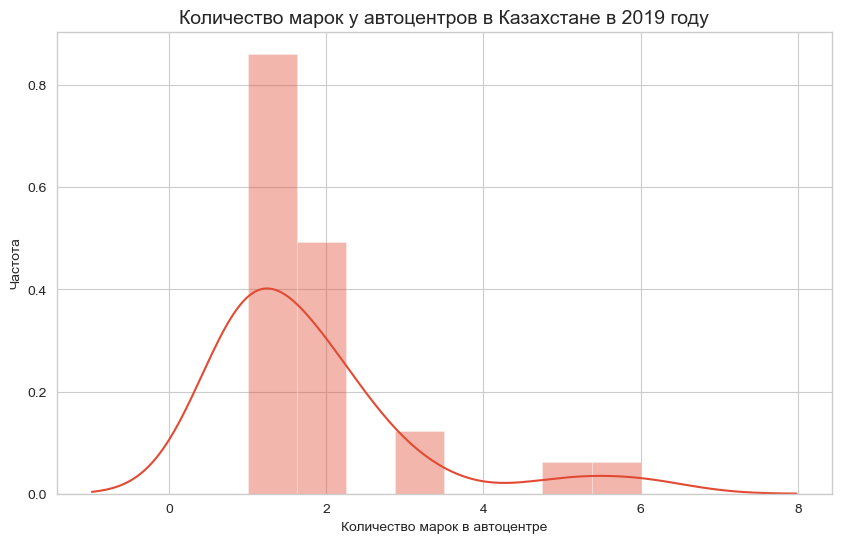

In [106]:
plt.figure(figsize=(10, 6))
sns.distplot(kz_brands_grouped.brand)
plt.title('Количество марок у автоцентров в Казахстане в 2019 году', fontsize=14)
plt.xlabel('Количество марок в автоцентре')
plt.ylabel('Частота')
plt.show()

<font face='liberation serif' size=4 color='darkblue'>Столбец ***Модель***</font>

In [107]:
df.model.nunique()

206

<font face='liberation serif' size=4>В 2019 году в Казахстане представлены 206 моделей автомобилей от всех марок.</font>

In [108]:
models_by_brand = df.groupby('brand').model.nunique().reset_index()

In [109]:
models_by_brand.nlargest(10, 'model')

,brand,model
2,BMW,14
20,Mercedes-Benz,14
33,Volkswagen,13
32,UAZ,10
1,Audi,9
7,GAZ,9
15,Kia,9
10,Hyundai Truck & Bus,8
18,Lexus,8
31,Toyota,8


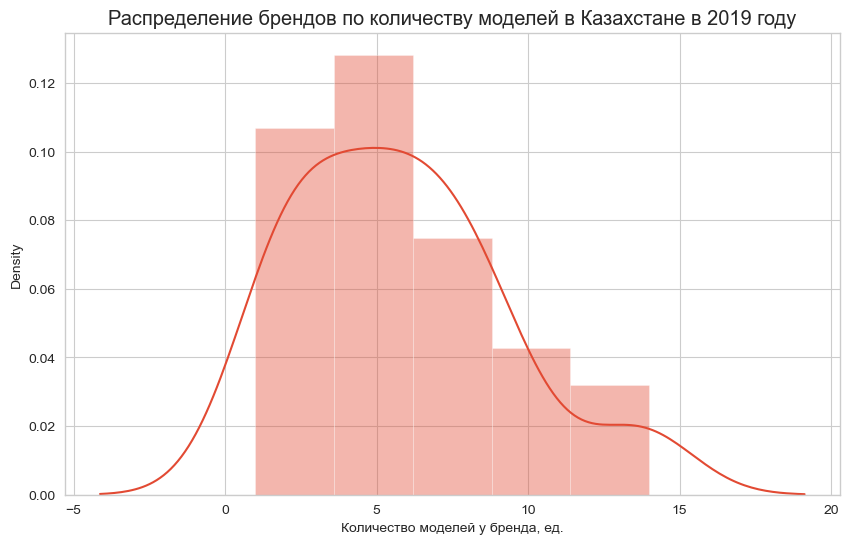

In [110]:
plt.figure(figsize=(10, 6))
sns.distplot(models_by_brand.model)
plt.title('Распределение брендов по количеству моделей в Казахстане в 2019 году')
plt.xlabel('Количество моделей у бренда, ед.')
plt.show()

<font face='liberation serif' size=4>В 2019 году в Казахстане 36 брендов представили 206 моделей. Наиболее частое количество моделей у марки - 5 моделей. Лидеры БМВ и Мерседес с 14 моделями, замыкает 10ку лидеров Тойота с 8 моделями.</font>

<font face='liberation serif' size=4 color='darkblue'>Столбец ***Страна-производитель***</font>

In [111]:
df.manufacturing_country.nunique()

18

<font face='liberation serif' size=4>В 2019 году в Казахстане представлены автомобили из 18 стран</font>

In [112]:
df.groupby('manufacturing_country').quantity.sum().sort_values(ascending=False).reset_index()

,manufacturing_country,quantity
0,KAZ,28983
1,RUS,10568
2,JPN,4608
3,TUR,1165
4,THA,894
5,USA,507
6,DEU,281
7,UK,193
8,AUT,69
9,UZB,69


<font face='liberation serif' size=4>Всего в Казахстане в 2019 году представлены автомобили из 18 стран. Лидер - местное производство - 61 процент, на втором месте Россия с 22 процентами и Япония с 12 процентами. Итого три страны занимают более 90 процентов рынка автомобилей.</font>

<font face='liberation serif' size=4 color='darkblue'>Столбец ***Год производства авто***</font>

In [113]:
df.release_year.value_counts(normalize=True).round(3).reset_index()

,release_year,proportion
0,2019,0.773
1,2018,0.224
2,2017,0.003
3,2016,0.001
4,2014,0.000
5,2013,0.000


<font face='liberation serif' size=4>Основная масса проданных в 2019 году автомобилей (77 процентов) - это автомобили 2019 года выпуска и 22 процента - автомобили 2018 года</font>

<font face='liberation serif' size=4 color='darkblue'>Столбец ***Объем двигателя***</font>

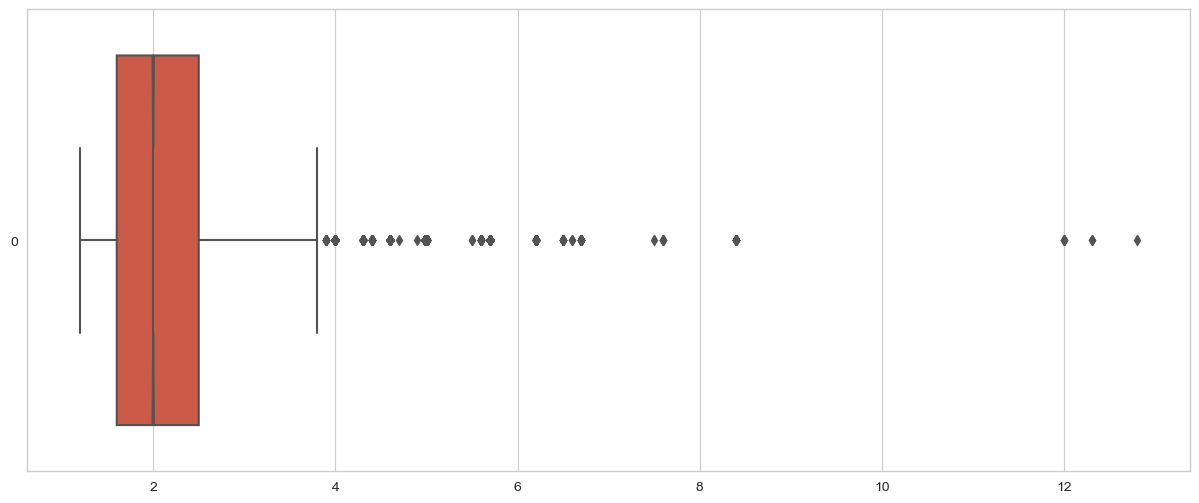

In [235]:
# посмотрим на распределение объемов двигателя в датасете
plt.figure(figsize=(15, 6))
sns.boxplot(df.engine_volume, orient='h', notch=True)
plt.show()

In [115]:
print(f'''Минимум: {df.engine_volume.min()}
Среднее: {df.engine_volume.mean():.2f}
Максимум: {df.engine_volume.max()}''')

Минимум: 1.2
Среднее: 2.29
Максимум: 12.8


<font face='liberation serif' size=4>Почистим от выбросов</font>

In [116]:
# считаем перваый и третьий квартили
q1_eng, q3_eng = np.quantile(df.engine_volume, [.25, .75])

In [117]:
# считаем межквартильный интервал
iqr_eng = q3_eng - q1_eng

In [118]:
# определяем нижнюю и верхние границы датасета
low_eng, top_eng = q1_eng - 1.5 * iqr_eng, q3_eng + 1.5 * iqr_eng

In [119]:
volume_without_outliers = df.query('(engine_volume > @low_eng) and (engine_volume < @top_eng)')

In [120]:
print(len(volume_without_outliers) / df.shape[0])

0.9327030832447344


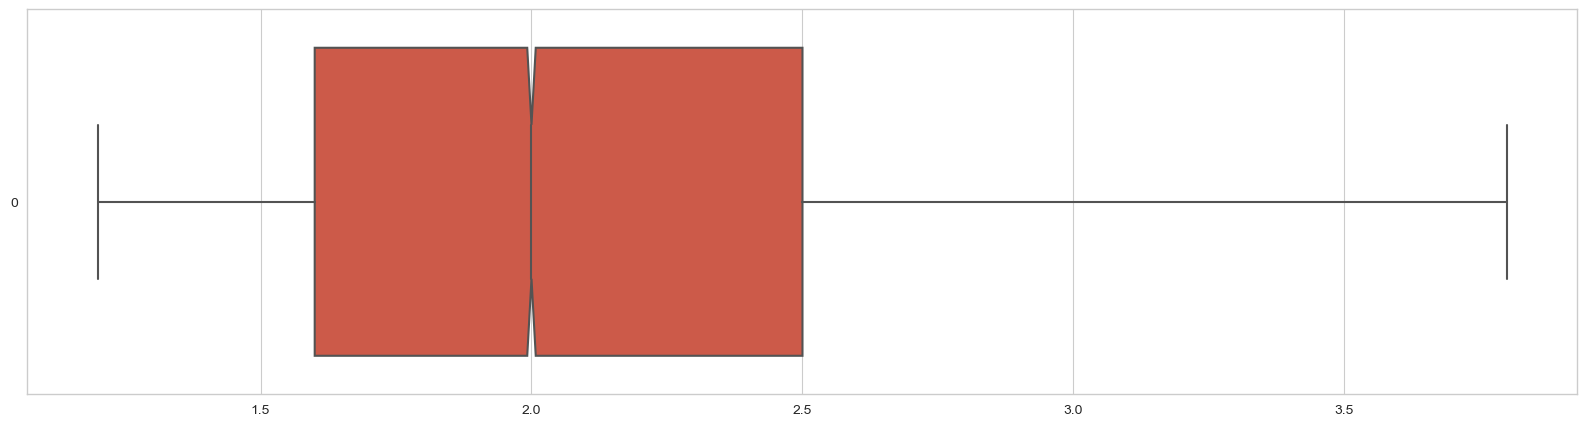

In [121]:
plt.figure(figsize=(20, 5))
sns.boxplot(volume_without_outliers.engine_volume, notch=True, whis=1.5, orient='h');

<font face='liberation serif' size=4>При новом раскладе объем двигателя колеблется от 1.2 литра до 4 и основная масса лежит в диапазоне от 1.6 до 2.5 литров</font>

<font face='liberation serif' size=4>Оставим данные в начальном виде, так как при очистке мы теряем порядка 7 процентов датасета</font>

<font face='liberation serif' size=4>Столбец ***Количество автомобилей в одном заказе***</font>

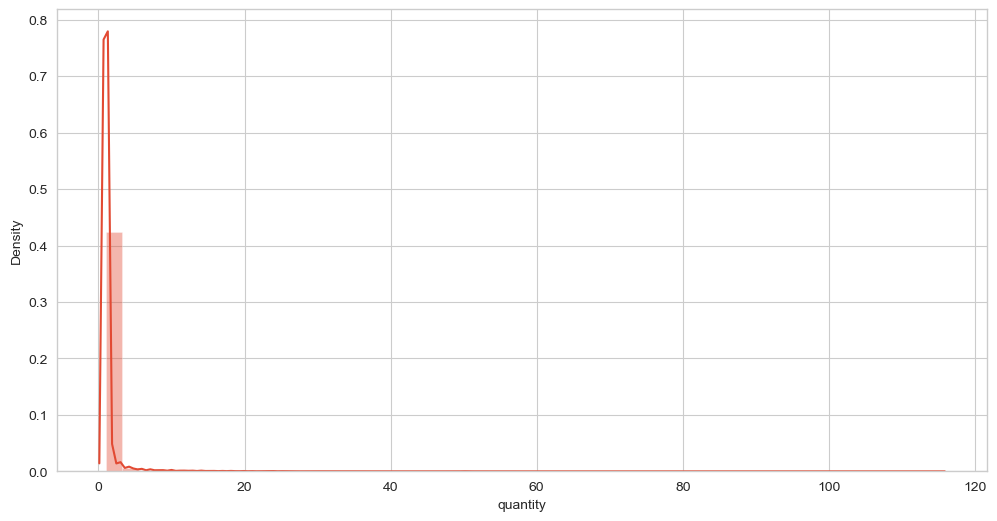

In [122]:
plt.figure(figsize=(12, 6))
sns.distplot(df.quantity);

<font face='liberation serif' size=4>Основная масса значений лежит в пределах одной машины, намного реже 2-3 и имеем длинный хвост до продажи в 110 автомобилей</font>

In [123]:
df.query('quantity >= 20')['company'].unique()

array(['БИПЭК АВТО', 'Daewoo Bus Kazakhstan'], dtype=object)

<font face='liberation serif' size=4>Такое количество продаж имеют только две компании. Это или автоцентры с хорошими связями с гос структурами или, что скорее всего представители марок, которые продают автомобили автоцентрам</font>

In [124]:
df.query('quantity >= 20').shape[0]

127

<font face='liberation serif' size=4>Всего таких продаж 127, так что в принципе можно их удалить для большей однородности данных, однако, в денежном выражении просадка будет очень серьезной - порядка 4 процентов от рынка</font>

In [125]:
(df.query('quantity >= 20').sell_price_usd.sum() / df.sell_price_usd.sum()).round(2) * 100

4.0

<font face='liberation serif' size=4>Столбец ***Цена, USD***</font>

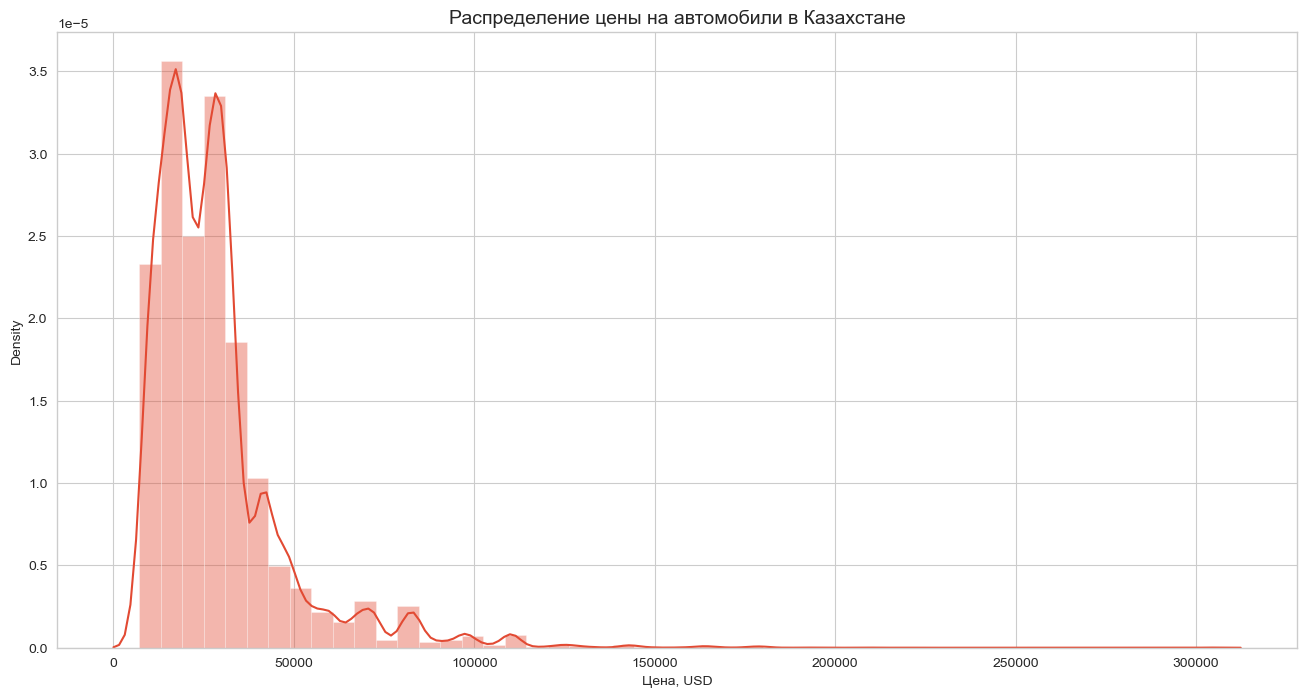

In [126]:
# построим гистограмму цен на автомобили
plt.figure(figsize=(16, 8))
sns.distplot(df.price_usd)
plt.title('Распределение цены на автомобили в Казахстане', fontsize=14)
plt.xlabel('Цена, USD')
plt.show()

In [127]:
print(f'Минимум: {df.price_usd.min()} \
      среднее: {df.price_usd.mean():.2f} \
      максимум: {df.price_usd.max():.2f}')

Минимум: 7100.0       среднее: 28560.54       максимум: 305252.02


<font face='liberation serif' size=4>Имеем подобие биноминального распределения с хвостом. Основная масса цен укладывается в диапазон 10-50 тысяч с пиками 18 и 30 тысяч. </font>

<font face='liberation serif' size=4>Ради интереса посмотрим на продажи за триста тысяч</font>

In [128]:
df.query('price_usd > 300000')

,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sales_date
20402,Автокапитал,Mercedes-Benz Trucks,Tourismo,2019,TUR,D,12.0,AT,RWD,Атырау,1,305252.0154,305252.0154,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-05-01
20403,Автокапитал,Mercedes-Benz Trucks,Tourismo,2019,TUR,D,12.0,AT,RWD,Атырау,1,303650.8783,303650.8783,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-06-01


<font face='liberation serif' size=4>Это туристические автобусы от мерседеса из Турции</font>

<font face='liberation serif' size=4>Построим ящик с усами - видны выбросы после 58 тысяч</font>

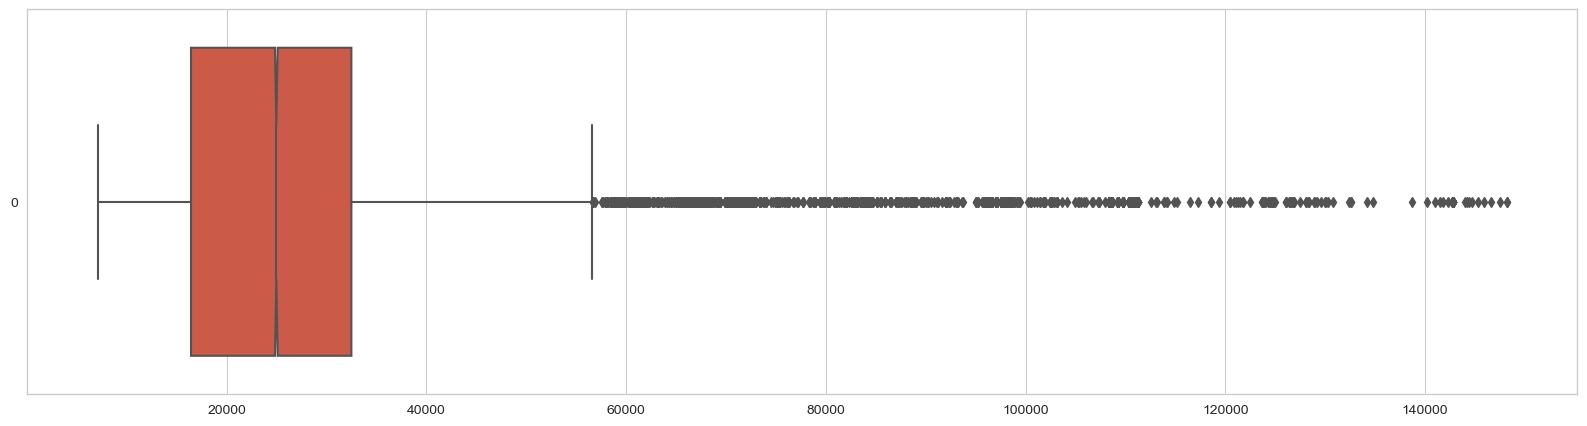

In [129]:
plt.figure(figsize=(20, 5))
sns.boxplot(df.query('price_usd < 150000').price_usd, notch=True, whis=1.5, orient='h');

<font face='liberation serif' size=4>Ради интереса почистим цены межквартильным размахом, в итоговом датасете мы не будем использовать очищенные данные, так как и эти продажи могут понадобиться.</font>

In [130]:
# считаем перваый и третьий квартили
q1_price, q3_price = np.quantile(df.price_usd, [.25, .75])

In [131]:
# находим межквартильный размах
iqr_price = q3_price - q1_price

In [132]:
# определяем границы цен, путем вычитания 1.5 размахов от 1 кваритиля и добавления 1.5 размахов к 3 кваритилю
low_price, top_price = q1_price - 1.5 * iqr_price, q3_price + 1.5 * iqr_price

In [133]:
price_without_outliers = df.query('(price_usd > @low_price) and (price_usd < @top_price)')

In [134]:
print(len(price_without_outliers) / df.shape[0])

0.9280767794028907


<font face='liberation serif' size=4>Отсеклось порядка 7 процентов выбросов</font>

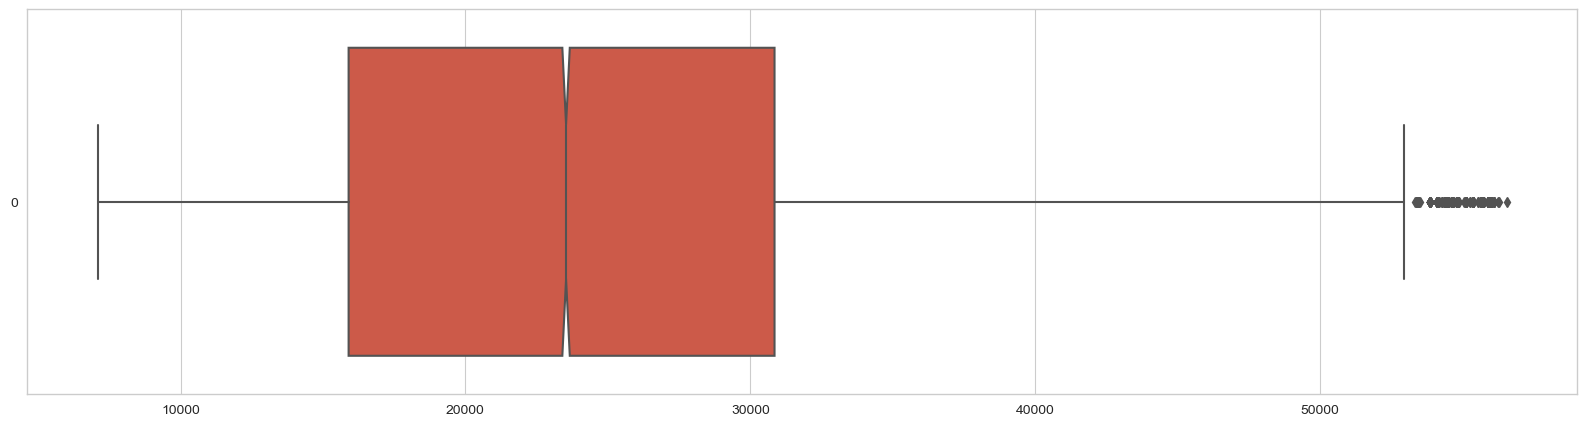

In [135]:
plt.figure(figsize=(20, 5))
sns.boxplot(price_without_outliers.price_usd, notch=True, whis=1.5, orient='h');

<font face='liberation serif' size=4>Ценовой диапазон: от 8 до 58 тысяч, средняя цена 24 тысячи</font>

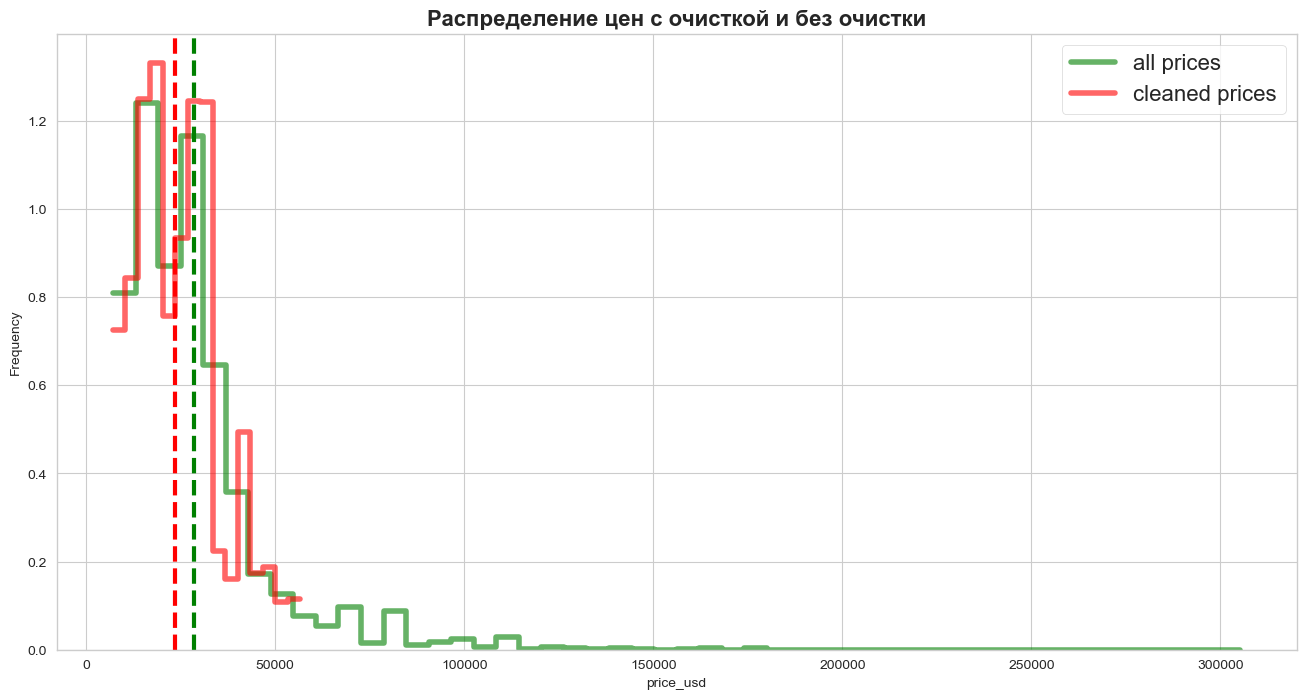

In [136]:
# отрисуем чистые цены и все цены на одном графике
plt.figure(figsize=(16, 8))

sns.histplot(df.price_usd, element='step', stat='frequency',
             bins=50, fill=False, linewidth=4, 
             color='green', alpha=.6,
            label='all prices')
sns.histplot(price_without_outliers.price_usd, element='step', stat='frequency',
             bins=15, fill=False, linewidth=4, 
             color='red', alpha=.6,
            label='cleaned prices')

plt.axvline(x=price_without_outliers.price_usd.median(), color='red', linestyle='--', linewidth=3)
plt.axvline(x=df.price_usd.mean(), color='green', linestyle='--', linewidth=3)

plt.title('Распределение цен с очисткой и без очистки', fontsize=16, weight='bold')
plt.legend(fontsize=16)
plt.show()

<font face='liberation serif' size=4>Интерквартильный размах избавляет нас от хвоста и данные становятся более однородными, однако, в итоговый датасет я перенесу все данные, так как не известно какие данные понадобятся для анализа.</font>

<font face='liberation serif' size=4 color='red'>***В принципе, если удалить продажи, где в заказе больше трех автомобилей (2 крупных игрока), то мы так же избавимся от хвоста в ценах от 100 000 и выше. Но при этом мы потеряем порядка 4 процента рынка в итоге в денежном выражении, но данные будут более однородными. Мне кажется оба варианта будут правильные для дальнейшего анализа датасета***</font>

<font face='liberation serif' size=4>Посмотрим на зависимости между признаками в датасете. Для этого построим тепловую карту с корреляцией Спирмана</font>

In [236]:
# создаем словари для категориальные столбцов с кодированием
fuel_type_dict = {k: v for k, v in zip(df.fuel_type.unique().tolist(), list(range(1, 5)))}
transmission_type_dict = {k: v for k, v in zip(df.transmission_type.unique().tolist(), list(range(1, 3)))}
drive_type_dict = {k: v for k, v in zip(df.drive_type.unique().tolist(), list(range(1, 5)))}
segment_2013_dict = {k: v for k, v in zip(df.segment_2013.unique().tolist(), list(range(1, 6)))}
class_2013_dict = {k: v for k, v in zip(df.class_2013.unique().tolist(), list(range(1, 22)))}

In [139]:
cat_cols = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']
cat_cols_dicts = [fuel_type_dict, transmission_type_dict, drive_type_dict, segment_2013_dict, class_2013_dict]

In [140]:
# делаем копию датасета, чтобы не заниматься обратным кодированием
df_copy = df.copy()

In [141]:
# кодируем значения столбцов
for col, vals in zip(cat_cols, cat_cols_dicts):
    df_copy[col] = df_copy[col].map(vals)

In [237]:
# выбираем числовые и закодированные категориальные столбцы
cols_to_corr = []
for col in df_copy.columns:
    if df_copy[col].dtypes in ['int32', 'float64', 'category']:
        cols_to_corr.append(col)

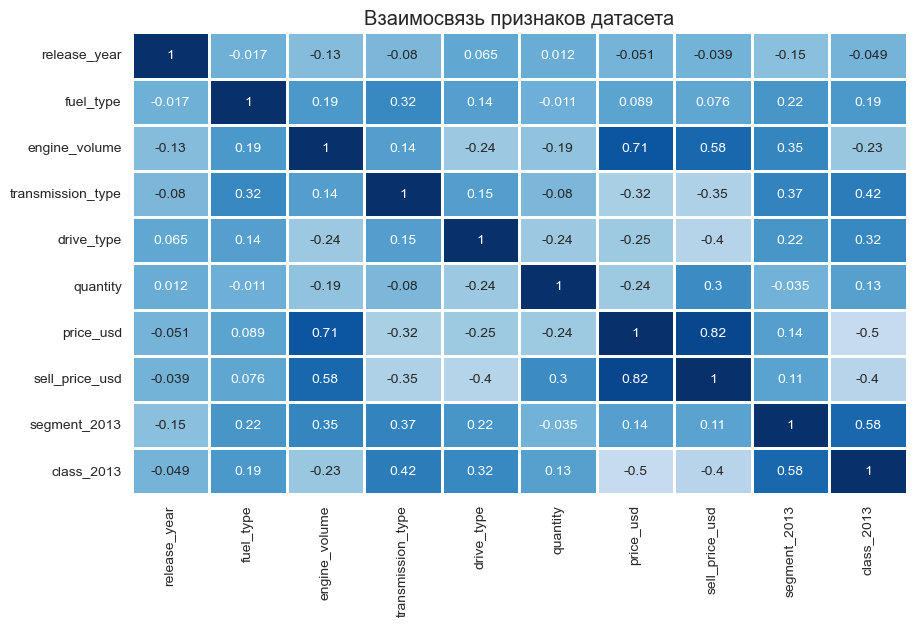

In [238]:
# строим тепловую карту с корреляцией Спирмана
plt.figure(figsize=(10, 6))
sns.heatmap(df_copy[cols_to_corr].corr(method='spearman'), 
            annot=True, cmap='Blues', linewidths=2, 
            vmin=-1, center=0, vmax=1, cbar=False)
plt.title('Взаимосвязь признаков датасета')
plt.show()

<font face='liberation serif' size=4>Сильно полезных связей не найдено. Есть очевидная связь между количеством автомобилей в заказе и ценой заказа. Так же есть выше среднего зависимость цены от объема двигателя. Есть средняя зависимость между сегментом и классом.</font>

<font face='liberation serif' size=4>Данные готовы для работы</font>

In [143]:
# сохраняем датасет в файл
df.to_csv('clean_auto_kz.csv')

## <font face='Liberation serif' size=6>**4. Исследуем рынок**</font>

<font face='liberation serif' size=4>Найдем крупнейших игроков на рынке авто Казахстана</font>

In [145]:
pie_data_brands = (
    df.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False)
    .to_frame()
    .reset_index()
    .nlargest(10, 'sell_price_usd')
)
sizes = pie_data_brands['sell_price_usd'].tolist()
labels = pie_data_brands['brand'].tolist()

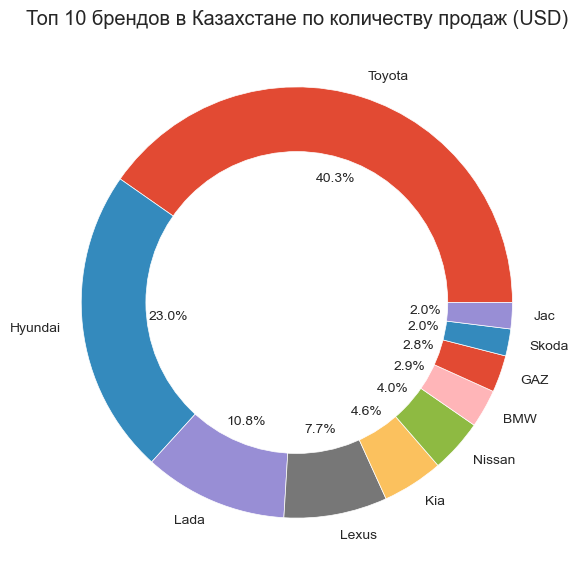

In [146]:
# задаем размер фигуры
plt.figure(figsize=(7, 7))

# добавляем название графика
plt.title('Топ 10 брендов в Казахстане по количеству продаж (USD)')

# рисуем круговую диаграмму
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# добавляем белый круг в центр
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

<font face='liberation serif' size=4>В денежном выражении Тойота держит 40 процентов рынка. Это основная особенность Казахстана - любой казах покупает Тойоту, как только его доход достигает уровня, когда он может позволить ее себе в кредит. На вторичном рынке ситуация похожая, только соответственно уровень дохода уже пониже.</font>

<font face='liberation serif' size=4>Посмотрим на динамику продаж автомобилей в Казахстане в 2019 году</font>

In [147]:
sales_by_month = df.groupby('sales_date')['sell_price_usd'].sum().to_frame().reset_index()

In [148]:
x = sales_by_month.sales_date.tolist()
y = sales_by_month.sell_price_usd.tolist()

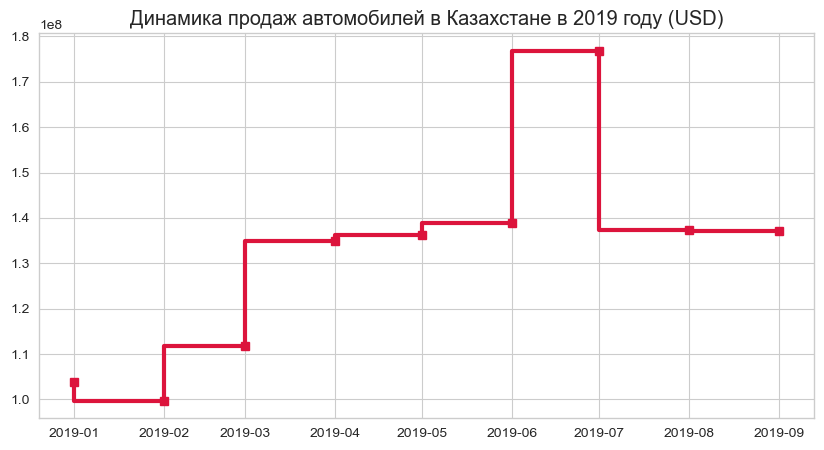

In [149]:
plt.figure(figsize=(10, 5))
plt.title('Динамика продаж автомобилей в Казахстане в 2019 году (USD)')
plt.step(x, y, linewidth=3, marker='s', color='crimson')

plt.show()

<font face='liberation serif' size=4>Январь-февраль стабильно провальные как и во всем мире. С арпеля ровная динамика продаж с пиком в июле.</font>

<font face='liberation serif' size=4>Посмотрим на продажи в динамике по категориальным признакам</font>

In [150]:
sales_by_month_2 = df.groupby(['sales_date', 'fuel_type'])['sell_price_usd'].sum().to_frame().reset_index()

In [151]:
fuel_type = sales_by_month_2.fuel_type.unique().tolist()
color = ['crimson', 'royalblue', 'forestgreen']

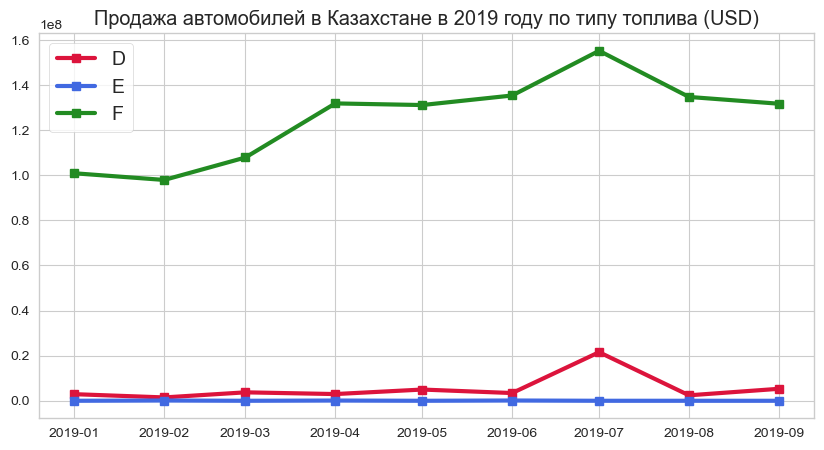

In [152]:
plt.figure(figsize=(10, 5))

plt.title('Продажа автомобилей в Казахстане в 2019 году по типу топлива (USD)')

for el, col in zip(fuel_type, color):
    plt.plot(sales_by_month_2.query("fuel_type == @el").sales_date.tolist(),
             sales_by_month_2.query("fuel_type == @el").sell_price_usd.tolist(), 
             linewidth=3, marker='s', color=col, label=el)
    
plt.legend(fontsize=14)

plt.show()

In [153]:
sales_by_month_3 = df.groupby(['sales_date', 'segment_2013'])['sell_price_usd'].sum().to_frame().reset_index()

In [154]:
segment_type = sales_by_month_3.segment_2013.unique().tolist()
color_2 = ['crimson', 'royalblue', 'forestgreen', 'lightslategrey', 'orange']

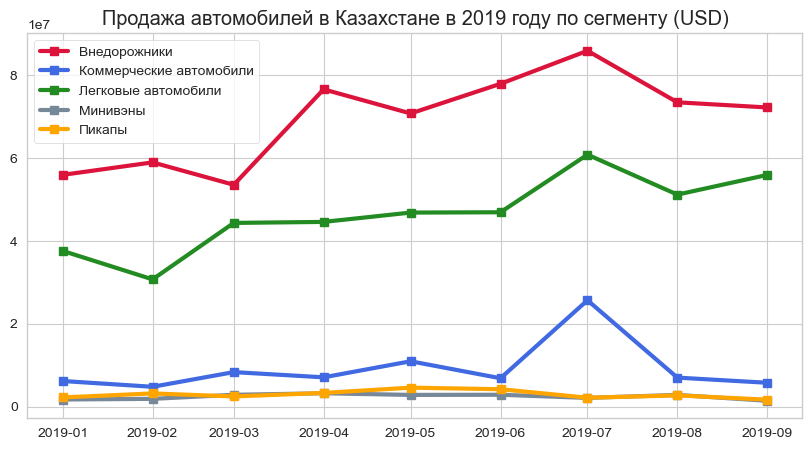

In [155]:
plt.figure(figsize=(10, 5))

plt.title('Продажа автомобилей в Казахстане в 2019 году по сегменту (USD)')

for el, col in zip(segment_type, color_2):
    plt.plot(sales_by_month_3.query("segment_2013 == @el").sales_date.tolist(),
             sales_by_month_3.query("segment_2013 == @el").sell_price_usd.tolist(), 
             linewidth=3, marker='s', color=col, label=el)
    
plt.legend()
plt.show()

<font face='liberation serif' size=4>***Из графиков видно, что большую часть рынка занимают бензиновые внедорожники марки Тойота***</font>

<font face='liberation serif' size=4>Посмотрим на продажи автомобилей в Казахстане в 2019 году по брендам</font>

In [156]:
sales_by_brand_usd = df.groupby('brand')['sell_price_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

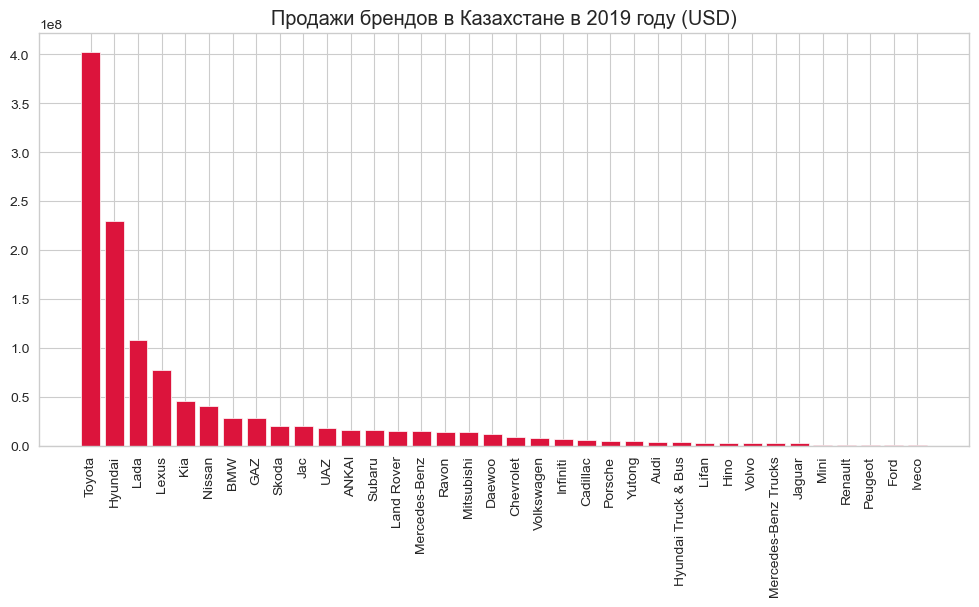

In [157]:
plt.figure(figsize=(12, 7))

bars = sales_by_brand_usd.brand.tolist()
height = sales_by_brand_usd.sell_price_usd.tolist()

plt.title('Продажи брендов в Казахстане в 2019 году (USD)')

plt.bar(bars, height, color='crimson')
plt.xticks(bars, rotation=90)
 
plt.subplots_adjust(bottom=0.4, top=0.99)

In [158]:
sales_by_brand_cnt = df.groupby('brand')['quantity'].count().sort_values(ascending=False).to_frame().reset_index()

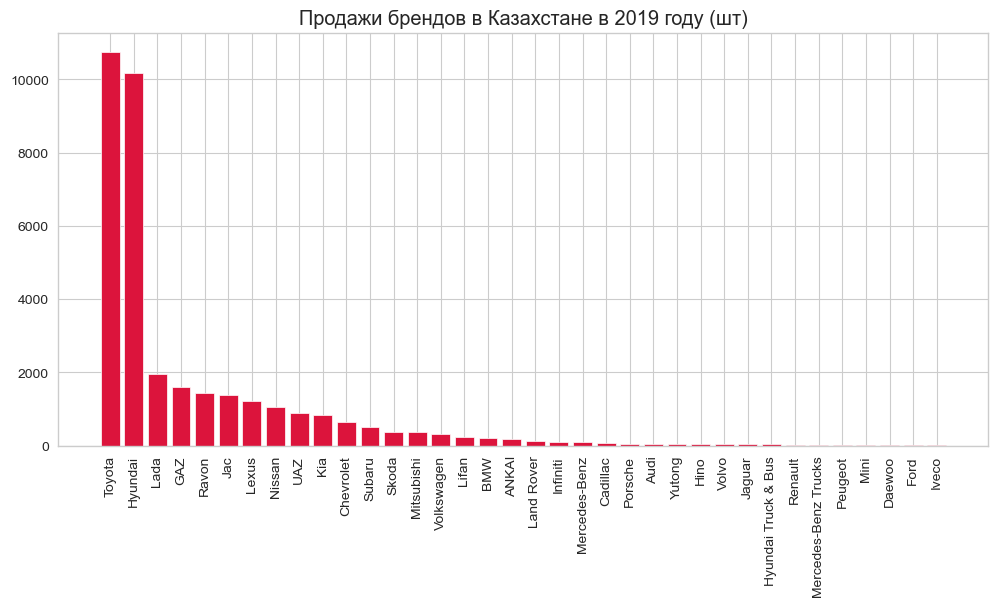

In [159]:
plt.figure(figsize=(12, 7))

bars = sales_by_brand_cnt.brand.tolist()
height = sales_by_brand_cnt.quantity.tolist()

plt.title('Продажи брендов в Казахстане в 2019 году (шт)')

plt.bar(bars, height, color='crimson')
plt.xticks(bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

<font face='liberation serif' size=4>По двум графикам видно, что у Тойоты просто невероятная маржинальность продаж, у лады чуть хуже, а у Hyundai при равном количестве проданных с Тойота машин, продажи в денежном эквиваленте очень отстают. Посмотрим на маржинальность по брендам</font>

In [160]:
sales_income = (
    df.groupby('brand').agg({'sell_price_usd':'sum', 'quantity':'count'})
    .reset_index().rename(columns={'sell_price_usd':'total_sales'})
)
sales_income['sale_ratio'] = round(sales_income.total_sales / sales_income.quantity, 0)
sales_income = sales_income.sort_values(by='sale_ratio', ascending=False)

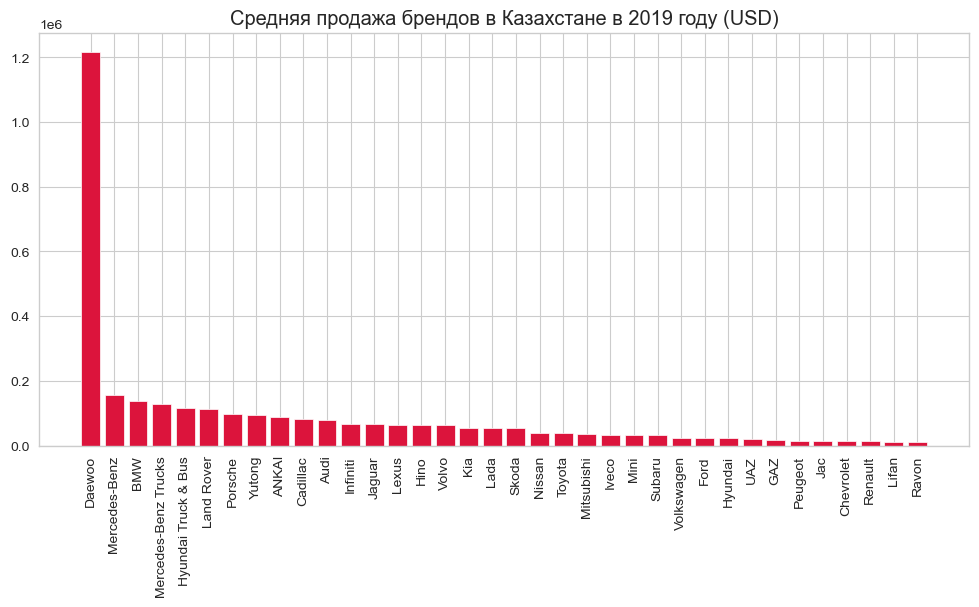

In [161]:
plt.figure(figsize=(12, 7))

bars = sales_income.brand.tolist()
height = sales_income.sale_ratio.tolist()

plt.title('Средняя продажа брендов в Казахстане в 2019 году (USD)')

plt.bar(bars, height, color='crimson')
plt.xticks(bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

<font face='liberation serif' size=4>Уберем Дэу, которые за год продали 10 автобусов</font>

In [162]:
sales_income = sales_income.query('brand != "Daewoo"')

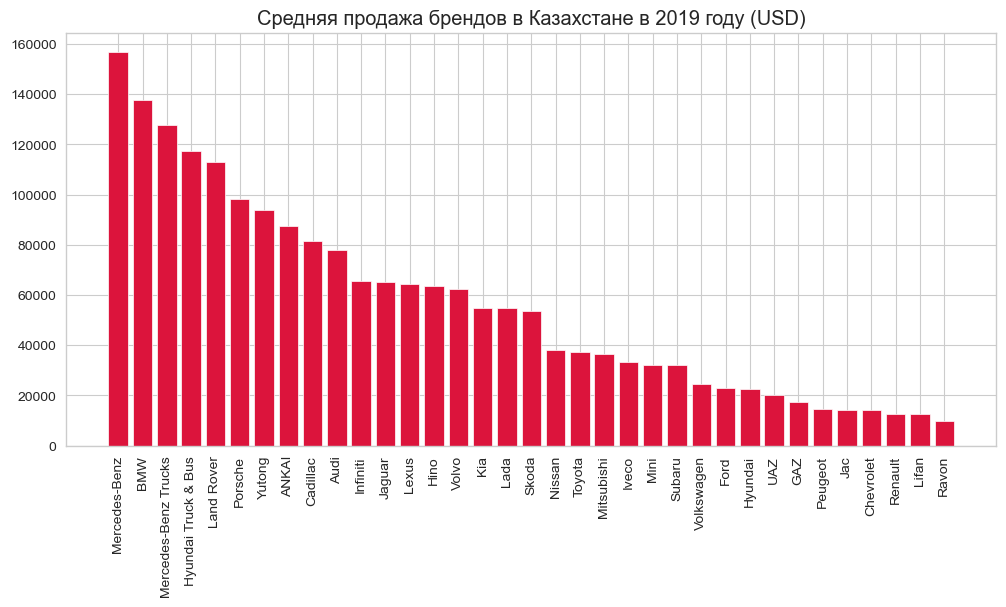

In [163]:
plt.figure(figsize=(12, 7))

bars = sales_income.brand.tolist()
height = sales_income.sale_ratio.tolist()

plt.title('Средняя продажа брендов в Казахстане в 2019 году (USD)')

plt.bar(bars, height, color='crimson')
plt.xticks(bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

<font face='liberation serif' size=4>Если Тойота лидирует по количеству проданных машин и валовой выручке, то лучшая средняя продажа как раз таки у премиальных брендов - Мерседес и БМВ, которые продаются дороже, чем грузовики</font>

In [164]:
state_sales = df.groupby('state')['sell_price_usd'].sum().astype('int').sort_values(ascending=False).reset_index().nlargest(10, 'sell_price_usd')

<font face='liberation serif' size=4>Проанализируем продажи по регионам</font>

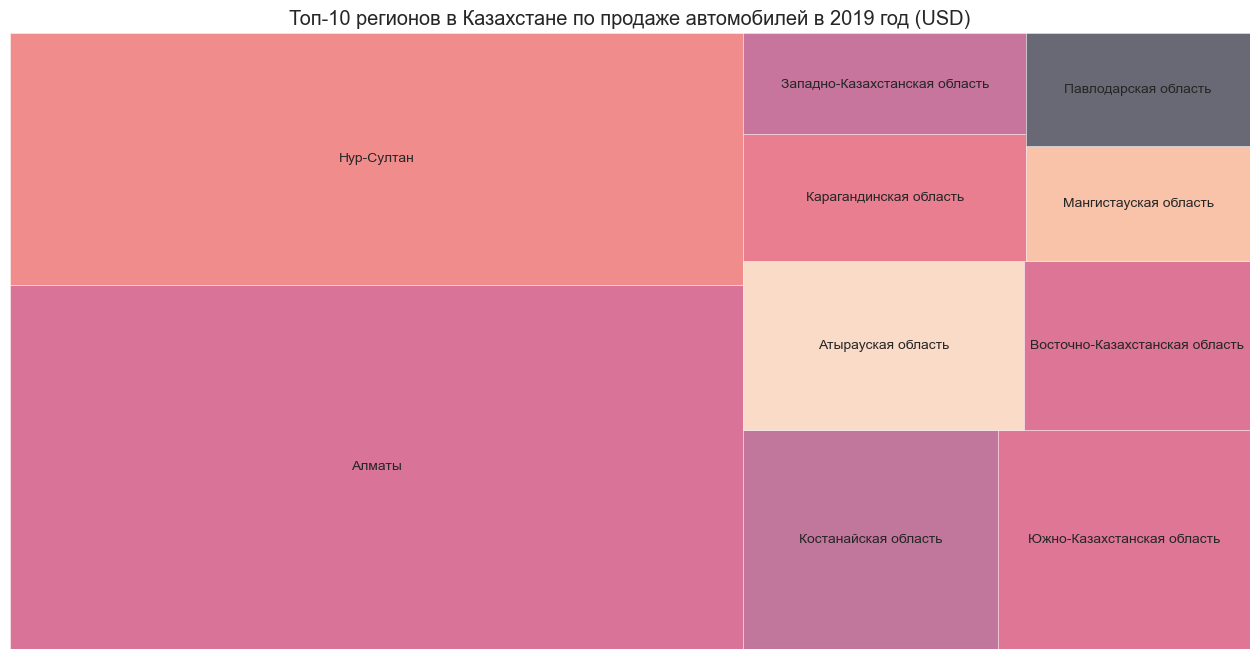

In [165]:
plt.figure(figsize=(16, 8))
plt.title('Топ-10 регионов в Казахстане по продаже автомобилей в 2019 год (USD)')
squarify.plot(sizes=state_sales['sell_price_usd'], label=state_sales['state'], alpha=.6 )
plt.axis('off')
plt.show()

<font face='liberation serif' size=4>Астана и Алматы занимают две трети рынка всех продаж автомобилей</font>

<font face='liberation serif' size=4>Посмотрим на эффективность автоцентров</font>

In [166]:
top_10_dealers = df.groupby('company')['sell_price_usd'].sum().astype('int').sort_values(ascending=False).reset_index()

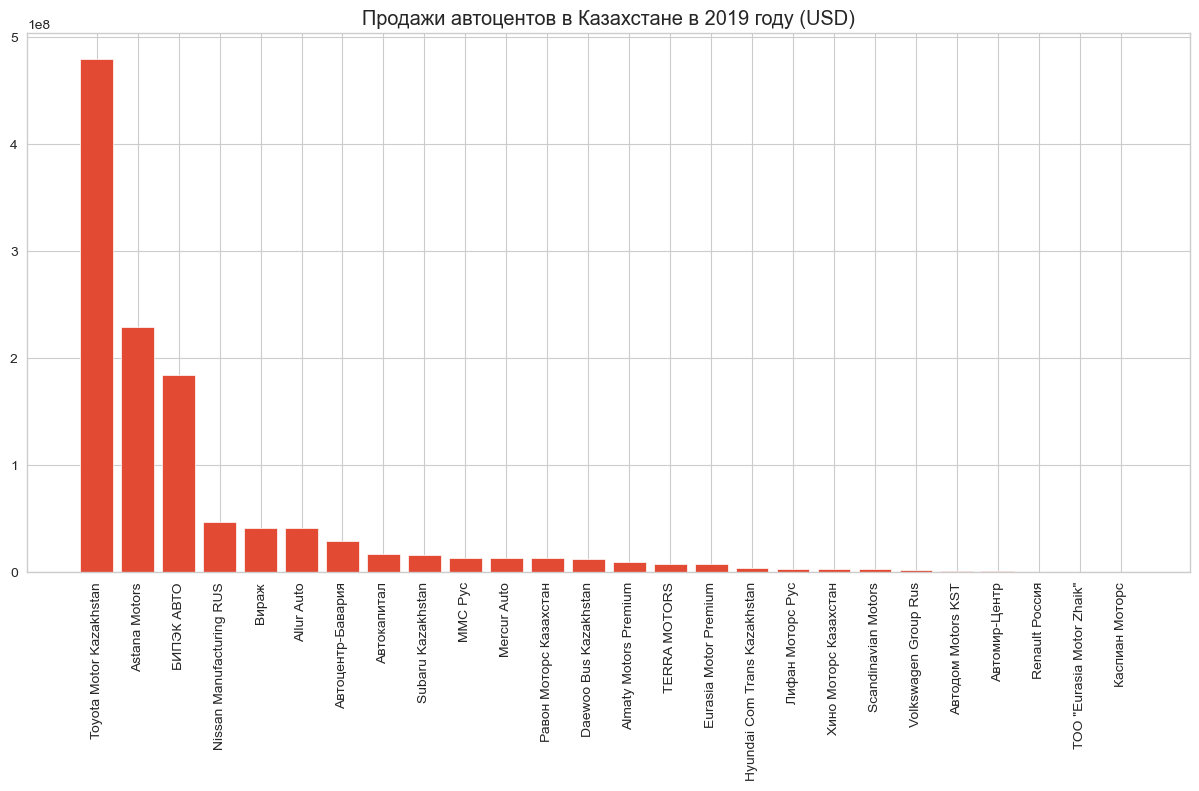

In [167]:
plt.figure(figsize=(15, 7))
plt.title('Продажи автоцентов в Казахстане в 2019 году (USD)')
plt.bar(top_10_dealers.company, top_10_dealers.sell_price_usd)
plt.xticks(rotation=90)
plt.show()

<font face='liberation serif' size=4>Тойота доминирует больше, чем в два раза</font>

<font face='liberation serif' size=4>Проведем двухфакторный анализ. Посмотрим на продажи брендов в разбивке по классам авто</font>

In [168]:
brand_class = df.groupby(['brand', 'class_2013'])['sell_price_usd'].sum().reset_index()

In [169]:
brand_class_pivot = brand_class.pivot_table(index='brand', columns='class_2013', values='sell_price_usd')

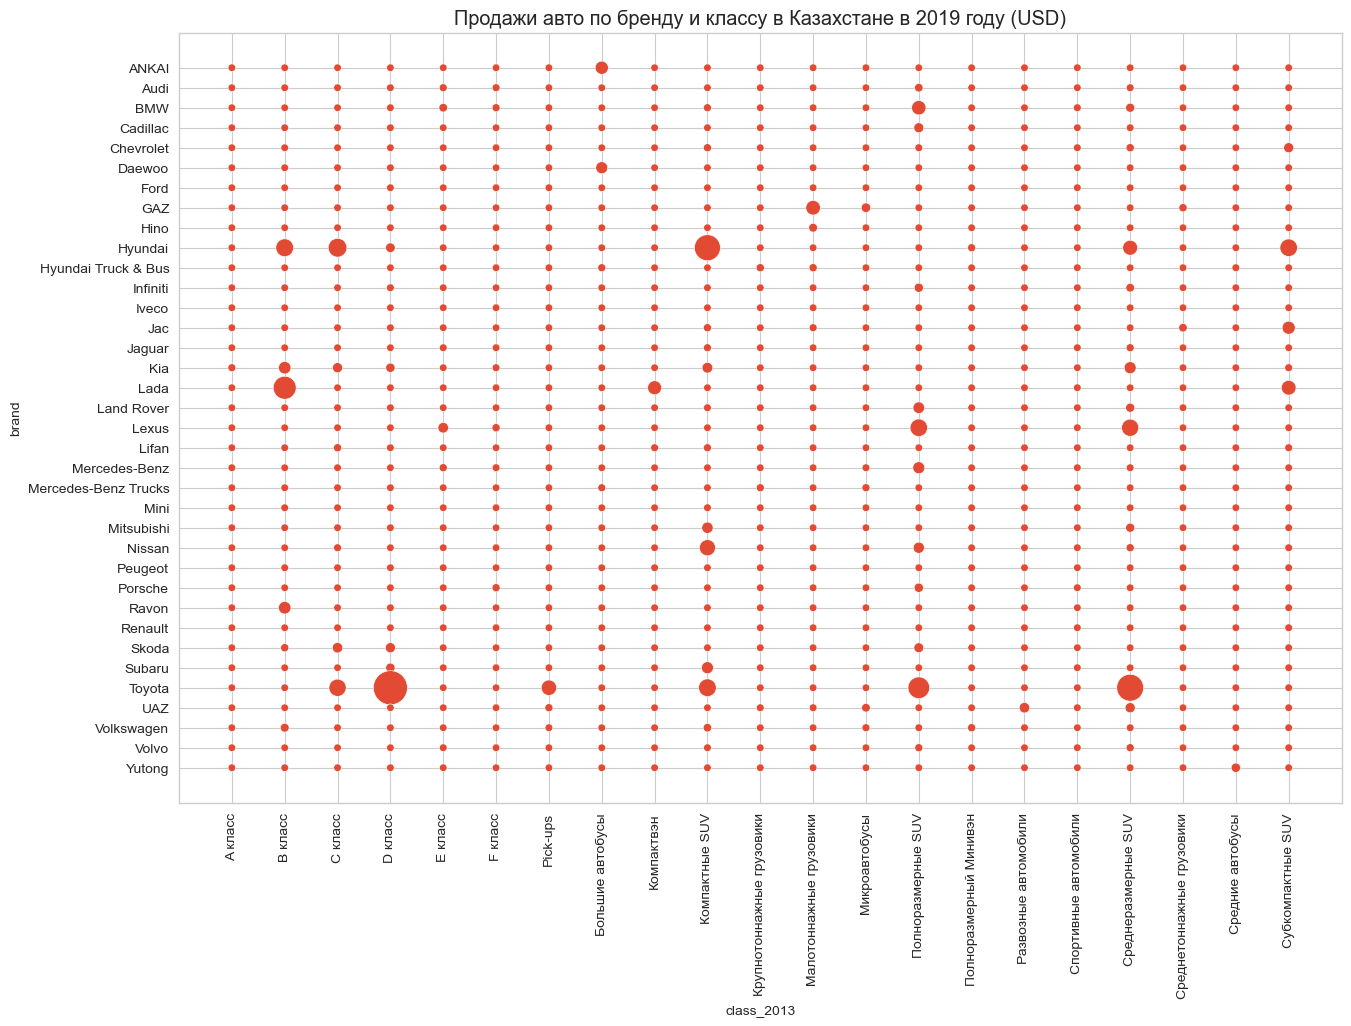

In [170]:
plt.figure(figsize=(15, 10))
plt.title('Продажи авто по бренду и классу в Казахстане в 2019 году (USD)')
sns.scatterplot(data=brand_class, x='class_2013', y='brand', size='sell_price_usd', legend=False, sizes=(30, 600))
plt.xticks(rotation=90)
plt.show()

<font face='liberation serif' size=4>Посмотрим на десятку лучших моделей автомобилей по продажам в ценовом и натуральном выражении.</font>

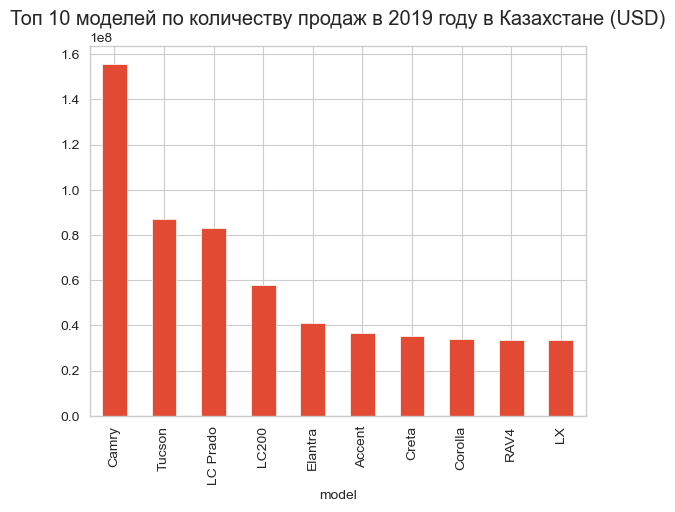

In [171]:
models_usd_title = 'Топ 10 моделей по количеству продаж в 2019 году в Казахстане (USD)'
df.groupby('model')['sell_price_usd'].sum().nlargest(10).plot(kind='bar').set_title(models_usd_title);

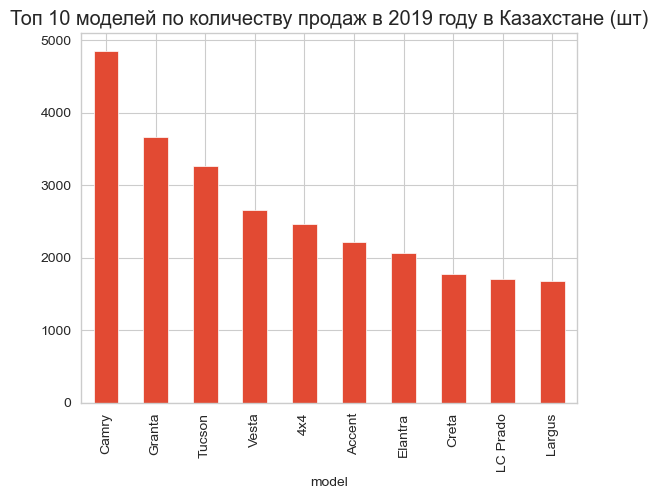

In [172]:
models_qty_title = 'Топ 10 моделей по количеству продаж в 2019 году в Казахстане (шт)'
df.groupby('model')['quantity'].sum().nlargest(10).plot(kind='bar').set_title(models_qty_title);

<font face='liberation serif' size=4>Камри вне конкуренции )</font>

<font face='liberation serif' size=4>Выделим отдельно Тойоту</font>

In [173]:
toyota = df[df.brand == 'Toyota']

In [174]:
toyota.groupby('model').sell_price_usd.sum().astype('int').sort_values(ascending=False) \
.reset_index().rename(columns={'sell_price_usd':'total_sales'})

,model,total_sales
0,Camry,155748735
1,LC Prado,83134112
2,LC200,57893775
3,Corolla,33812151
4,RAV4,33725128
5,HILUX DC,25378821
6,HIGHLANDER,10538908
7,C-HR,2125919


In [175]:
toyota.company.unique()

array(['Toyota Motor Kazakhstan'], dtype=object)

### Ситуация

Вы - маркетолог-аналитик Mercur auto и ваша задача определить где находится компания на текущий момент и какие направления развития можно предложить

In [176]:
# создадим датасет для Меркур авто
mercur = df[df.company == 'Mercur Auto']

In [177]:
# выделим бренды Меркур авто
mercur_brands = mercur.brand.unique().tolist()

<font face='liberation serif' size=6>**5. Определим позицию Mercur auto на рынке Казахстана в 2019 году**</font>

<font face='liberation serif' size=4>**Описание ситуации:** вы - маркетолог-аналитик в компании ***Mercur auto*** и ваша задача определить текущее состояние дел в внутри компании и на рынке в целом.</font>

<font face='liberation serif' size=5>**Показатели**</font>

<font face='liberation serif' size=4>**Прибыль и выручка**</font>

<font face='liberation serif' size=4>Валовая выручка за 2019 год</font>

In [178]:
mercur.sell_price_usd.sum().round(2)

12839872.25

<font face='liberation serif' size=4>Валовая выручка в разбивке по брендам</font>

In [179]:
mercur.groupby('brand')['sell_price_usd'].sum().reset_index().round(2)

,brand,sell_price_usd
0,Audi,4059490.43
1,Porsche,5113512.70
2,Volkswagen,3666869.13


<font face='liberation serif' size=4>Средняя цена продажи автомобиля, USD</font>

In [180]:
mercur.sell_price_usd.mean().round(2)

48820.81

<font face='liberation serif' size=4>Средняя цена продажи автомобиля в разбивке по брендам, USD</font>

In [181]:
mercur.groupby('brand').sell_price_usd.mean().round(2).reset_index()

,brand,sell_price_usd
0,Audi,78067.12
1,Porsche,98336.78
2,Volkswagen,23062.07


<font face='liberation serif' size=4>Выручка за период помесячно</font>

In [182]:
mercur.groupby('sales_date').sell_price_usd.sum().astype('int').reset_index()

,sales_date,sell_price_usd
0,2019-01-01,982865
1,2019-02-01,1896553
2,2019-03-01,2382517
3,2019-04-01,1678518
4,2019-05-01,1535620
5,2019-06-01,835751
6,2019-07-01,1386826
7,2019-08-01,1110374
8,2019-09-01,1030846


<font face='liberation serif' size=4>Выручка за период помесячно в разбивке по брендам</font>

In [183]:
mercur_pivot = (mercur.pivot_table(index='sales_date', 
                                   columns='brand', 
                                   values='sell_price_usd', 
                                   aggfunc=np.sum, 
                                   fill_value=0)
)
for col in ['Audi', 'Porsche', 'Volkswagen']:
    mercur_pivot[col] = mercur_pivot[col].astype('int')

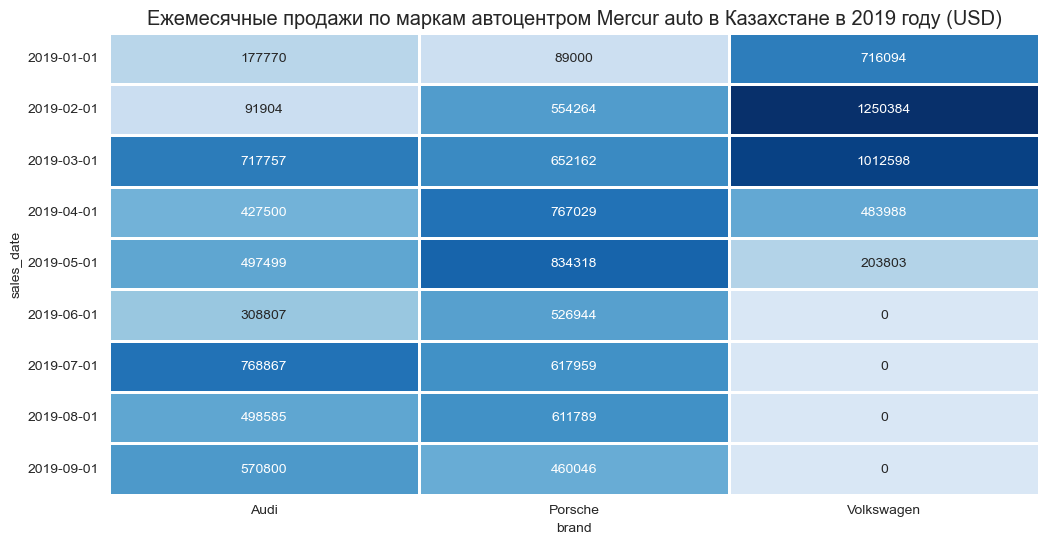

In [184]:
plt.figure(figsize=(12,6))
plt.title('Ежемесячные продажи по маркам автоцентром Mercur auto в Казахстане в 2019 году (USD)')
sns.heatmap(mercur_pivot, annot=True, fmt='.0f', 
            cbar=False, cmap='Blues', 
            vmin=0, 
            center=450000, 
            vmax=1100000, 
            linewidth=2)
plt.show()

<font face='liberation serif' size=4>Средняя цена продажи автомобиля помесячно, USD</font>

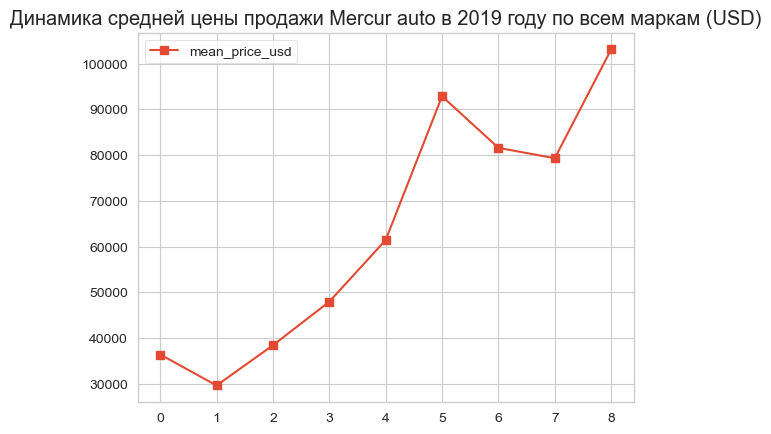

In [185]:
title='Динамика средней цены продажи Mercur auto в 2019 году по всем маркам (USD)'
mercur.groupby('sales_date').sell_price_usd.mean().round(2) \
.reset_index().rename(columns={'sell_price_usd':'mean_price_usd'}).plot(marker='s').set_title(title);

<font face='liberation serif' size=4>Средняя цена продажи автомобиля помесячно в разбивке по брендам, USD</font>

In [186]:
brand_means = mercur.groupby(['sales_date', 'brand']).sell_price_usd.mean().round(2).reset_index()
colors = ['crimson', 'darkgreen', 'darkblue']

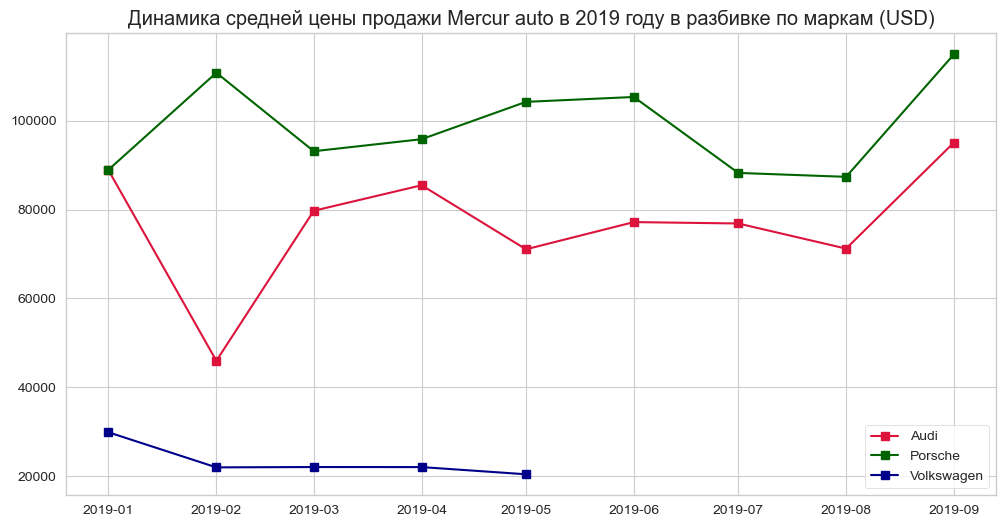

In [187]:
plt.figure(figsize=(12,6))
plt.title('Динамика средней цены продажи Mercur auto в 2019 году в разбивке по маркам (USD)')
for el, col in zip(mercur_brands, colors):
    plt.plot(brand_means.query('brand == @el').sales_date, 
             brand_means.query('brand == @el').sell_price_usd, 
             marker='s', color=col, label=el)

plt.legend()
plt.show()

<font face='liberation serif' size=4>**Прибыль**</font>

In [269]:
# выделим меркур отдельно
mercur = df.query("company == 'Mercur Auto'")

In [270]:
# посчитаем прибыль, основываясь на том, что премиум бренды дают дилеру 2 процента с продажи машины
mercur['income'] = mercur.sell_price_usd * .03

In [273]:
print(f'Прибыль Mercur Auto от продажи автомобилей составила {mercur.income.sum():.2f}')

Прибыль Mercur Auto от продажи автомобилей составила 385196.17


In [284]:
# приыбль по маркам (потеря фольксвагена конечно болезненна)
mercur.groupby('brand').income.sum().round(2).reset_index()

,brand,income
0,Audi,121784.71
1,Porsche,153405.38
2,Volkswagen,110006.07


<font face='liberation serif' size=4>**Емкость рынка, USD**</font>

In [255]:
# продажи за 9 месяцев
sales_9_months = df.sell_price_usd.sum().round(2)

In [257]:
# к концу года обычно спад на авто, поэтому берем не 25 процентов увеличения, а только 15
sales_9_months * .15 + sales_9_months

1297716398.599

<font face='liberation serif' size=4>Итого емкость рынка автомобилей в Казахстане в 2019 году составляет порядка 1.3 миллиарда вечно зеленых американских енотов</font>

<font face='liberation serif' size=4>**Доля рынка Mercur auto**</font>

In [268]:
print(f"Доля рынка Mercur Auto (USD): {df[df['company'] == 'Mercur Auto'].sell_price_usd.sum() / df.sell_price_usd.sum():.2%}")

Доля рынка Mercur Auto (USD): 1.14%


<font face='liberation serif' size=4>**Конкуренты**</font>

<font face='liberation serif' size=4>Конкуренты косвенные (тот же класс)</font>

In [277]:
df[df['brand'].isin(['Audi', 'BMW', 'Mercedes-Benz', 'Land Rover', 'Porsche', 'Lexus', 'Infinity'])].company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'Almaty Motors Premium',
       'TERRA MOTORS', 'Toyota Motor Kazakhstan', 'Автокапитал'],
      dtype=object)

<font face='liberation serif' size=4>Прямые конкуренты (те же марки)</font>

In [279]:
df[df['brand'].isin(['Audi', 'Porsche', 'Volkswagen'])].company.unique()

array(['Mercur Auto', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"'], dtype=object)